In [ ]:
# 패키지 설치
#!pip install --upgrade pymilvus "pymilvus[model]"
#!pip install openpyxl

In [1]:
from pymilvus import MilvusClient
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File load

In [2]:
tracker_info=pd.read_excel("../../data/tacker_Info.xlsx", header=1)
model_df=pd.read_excel("../../data/250224 model_STD.xlsx")
maker_df=pd.read_excel("../../data/250224 maker_STD.xlsx")

/workspace/Large_languige_model/.venv/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:223: UserWarning: Cell S424169 is marked as a date but the serial value 2200002640 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)
/workspace/Large_languige_model/.venv/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:223: UserWarning: Cell F506984 is marked as a date but the serial value 1000039148 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)


In [3]:
model_df

,modelID,modelSTDName,MakerID,modelAlias,category
0,MO737993,RCS2-SE7C-I-60-16-250-T2-M,MA275211,RCS2-SE7C-I-60-16-250-T2-M,Motion Control
1,MO736784,P50E-12-N,MA424,P50E-12-N,RF
2,MO6669,iH1000,MA245914,"iH1000,IH1000 HEAC,PUMP,IH1000,ITIM,W/INVRTR,D...",Pump
3,MO739233,SPR-903-X0675,MA2729,SPR-903-X0675,Robot
4,MO886711,CUWLS-080,MA252842,CUWLS-080,PKG ETC
...,...,...,...,...,...
385608,MO6090,DMC200A,MA2737,DMC200A,PKG ETC
385609,MO5986,NEWVIEW600,MA2608,NEWVIEW600,PKG ETC
385610,MO6690,TCT-62LMV,MA622,TCT-62LMV,PKG ETC
385611,MO954,FAD2200,MA1487,FAD2200,PKG ETC


- 스탠다드 모델의 전체 갯수는 385,613개이다. (장비와 파츠 포함)
- stardard 데이터임에도 null값이 많이 보인다.

In [4]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385613 entries, 0 to 385612
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   modelID       385613 non-null  object
 1   modelSTDName  385610 non-null  object
 2   MakerID       385612 non-null  object
 3   modelAlias    385599 non-null  object
 4   category      385612 non-null  object
dtypes: object(5)
memory usage: 14.7+ MB


 # 카테고리 이름
 - Category_Code         
 - Category_Name         
 - MAKER_ID              메이커 ID
 - MAKER_NAME            메이커 이름과 매칭되어 maker_id 부여
 - MODEL_ID              모델 ID 
 - MODEL_NAME            모델 name alias와 매칭되어 model ID 부텨
 - Process_NM            
 - Configuration         제품 상태정보
 - SERIAL_NO             
 - VINTAGE               생산년도
 - Tracker_availability  추적가능?
 - Seller                파는업체
 - Owner                 소유하고 있는곳
 - USER_FAB_ID           ??
 - COUNTRY_CD            국가코드
 - P&C                   ??
 - CODE                  ??
 - STD_MODEL_YN          stardard 모델과 매칭(Y), 안되었을때 (N)
 - STD_MAKER_YN          stardard 메이커와 매칭(Y), 안되었을때 (N)
 - Process(model Info)   ??
 - config(model Info)    configuration과 무슨차이(??)

In [5]:
tracker_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674744 entries, 0 to 674743
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Category_Code         641541 non-null  object
 1   Category_Name         641540 non-null  object
 2   MAKER_ID              674743 non-null  object
 3   MAKER_NAME            674157 non-null  object
 4   MODEL_ID              674744 non-null  object
 5   MODEL_NAME            674469 non-null  object
 6   Process_NM            400948 non-null  object
 7   Configuration         397434 non-null  object
 8   SERIAL_NO             165769 non-null  object
 9   VINTAGE               105469 non-null  object
 10  Tracker_availability  674740 non-null  object
 11  Seller                663163 non-null  object
 12  Owner                 606403 non-null  object
 13  USER_FAB_ID           468 non-null     object
 14  COUNTRY_CD            388412 non-null  object
 15  P&C              

In [6]:
tracker_info

,Category_Code,Category_Name,MAKER_ID,MAKER_NAME,MODEL_ID,MODEL_NAME,Process_NM,Configuration,SERIAL_NO,VINTAGE,...,Seller,Owner,USER_FAB_ID,COUNTRY_CD,P&C,CODE,STD_MODEL_YN,STD_MAKER_YN,Process(model Info),config(model Info)
0,GENERAL_TESTER,General Tester,MA45,Advantest,MO6491,8595E,Spectrum Analyzer,NaN,4115A05086,2001,...,Index Solution,"DOULTECH Co., Ltd",NaN,NaN,N,NaN,Y,Y,NaN,NaN
1,REFLOW_SOLDERING,Reflow&Soldering,MA752,Furukawa,MO6845,XNIII-725PCG,Reflow oven_,NaN,X04597,2000,...,JINUTEC CORPORATION,JINUTEC CORPORATION,NaN,NaN,N,NaN,Y,Y,NaN,NaN
2,PRINTER_DISPENSER,Printer&Dispenser,MA881,Hitachi,MO2604,TPM-1100,Screen Printer,NaN,667609AF6838,1996,...,"Kunshan Wospring Electronics Technology Co.,Ltd","Kunshan Wospring Electronics Technology Co.,Ltd",NaN,KR,N,NaN,Y,Y,NaN,NaN
3,CHIP_MOUNTER,Chip Mounter,MA740,Fuji,MO588,CP-842E,Chip mounter,NaN,538,2004,...,DHC,DHC,NaN,NaN,N,NaN,Y,Y,NaN,NaN
4,DICING_SAW,Dicing Saw,MA522,Disco,MO719,DFD640,Wafer Saw,Including CSP Function,EL1403,1996,...,SEMI RUN,SEMI RUN,NaN,KR,N,NaN,Y,Y,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674739,PARTS_PC,Part Others,MA110,AMAT,MO400396,0150-20124,NaN,Qty : 2 / Title : Applied Materials (AMAT) 015...,NaN,NaN,...,"Capitol Area Technology, LLC.","Capitol Area Technology, LLC.",NaN,US,Y,NaN,Y,Y,5500 PVD MAINFRAME,"Desc.: CABLE ASSY, GROUND STRAP ,LID, Consumab..."
674740,PARTS_PC,Part Others,MA262092,TEL,MO659810,ES3D05-200162-12,NaN,"Qty : 5 / Title : TEL ES3D05-200162-12 Ring, Q...",NaN,NaN,...,"Capitol Area Technology, LLC.","Capitol Area Technology, LLC.",NaN,US,Y,NaN,Y,Y,Etch system,"Desc.: RING,SHIELD(G1)"
674741,PARTS_PC,Part Others,MA110,AMAT,MO400983,0200-35051,NaN,Qty : 3 / Title : Applied Materials (AMAT) 020...,NaN,NaN,...,"Capitol Area Technology, LLC.","Capitol Area Technology, LLC.",NaN,US,Y,NaN,Y,Y,5200 ASD EPI,"Desc.: BAFFLE, INJECT NARROW,, Consumable: C"
674742,PARTS_PC,Part Others,MA283519,PARKER HANNIFIN CORP-COMPUMOTOR,MO797121,SVC2195M-7,NaN,Qty : 6 / Title : PARKER SVC2195M-7 VALVE SING...,NaN,NaN,...,"Capitol Area Technology, LLC.","Capitol Area Technology, LLC.",NaN,US,Y,NaN,N,N,NaN,NaN


# 1. 전처리

In [7]:
# 카테고리로 포함되는 값 확인
model_df["category"].value_counts().keys()

Index(['Part Others', 'MFC & LFC', 'Metrology', 'PKG ETC', 'Pump', 'Valve',
       'Fab Others', 'Motion Control', 'PCBs', 'RF', 'ATE ETC', 'Etch',
       'Chuck & Pedestal', 'Tester', 'WET', 'SMT ETC', 'Furnace',
       'General Tester', 'Track', 'Robot', 'Stepper', 'Chip Mounter', 'CVD',
       'Process Kit', 'PVD', 'Prober', 'Display', 'Scanner', 'Die Bonder',
       'Asher', 'Wire Bonder', 'Chiller & Scrubber', 'Gauge', 'Handler',
       'Dicing Saw', 'Microscope', 'Plastic Processing',
       'CMP Parts & Consumables', 'Implant', 'Printer&Dispenser', 'RTP',
       'Reflow&Soldering', 'Inspection', 'Back Grinder', 'CMP', 'Medical',
       'Laser', 'ECD', 'MoCVD', 'Other Industry > Other', 'PCB Equip', 'Solar',
       'LCD', 'Wafer', 'Auto Inserter', 'Others', 'Metalworking', 'Packaging'],
      dtype='object', name='category')

- 장비 카테고리 : 'Asher', 'CMP', 'CVD', 'ECD', 'Etch', 'Furnace', 'Implant', 'Metrology','PVD', 'RTP', 'Stepper', 
                    'Scanner', 'Track', 'WET', 'MoCVD', 'Fab Others', 'Prober','Handler','Tester','ATE ETC','Packaging',
                    'Dicing Saw','Wire Bonder','Die Bonder','Back Grinder','PKG ETC','Chip Mounter','Reflow&Soldering',
                    'Inspection','Auto Inserter','SMT ETC' 
- parts 카테고리 : 'PCBs', 'RF', 'CMP Parts & Consumables', 'Motion Control', 'Robot', 'Chuck & Pedestal', 'Process Kit', 
                'MFC & LFC', 'Gauge', 'Valve', 'Laser', 'Pump', 'Chiller & Scrubber', 'Part Others'
- 기타 카테고리 : 'General Tester','Microscope', 'Plastic Processing','Printer&Dispenser', 'Medical','Other Industry > Other',
                  'PCB Equip', 'Solar','LCD', 'Wafer', 'Others', 'Metalworking'



- standard 모델에도 nan값과 정리가 안된 파일들이 섞여있음
- hanna와 이야기 등록과정에서 이상한값들이 발생할수 있는데 목록공유해서 수정하도록 요청
- cem 팀에서는 중복은 1% 안될것이라고 하였으나 예상 수치는 전체에서 100개 정도 예상...

In [8]:
model_df[model_df.isna().any(axis=1)]

,modelID,modelSTDName,MakerID,modelAlias,category
21,MO898123,Software,MA1876,Software,NaN
268,MO898000,B2912A,MA10283,NaN,General Tester
11377,-1,EG32F15A30MA,NaN,"BREAKER_EG32F15A30MA,EG32F15A30MA",Part Others
14123,MO273433,Centura Carina Chamber,MA110,NaN,Etch
14528,MO784097,FC-2902MEP5-I,MA617,NaN,MFC & LFC
14792,MO783067,AD-AS-1B-1,MA882,NaN,Part Others
15092,MO340376,SB2500,MA285581,NaN,PKG ETC
19262,MO751179,NaN,MA282099,NaN,Part Others
19465,MO297128,NPM-W NM-EJM2D,MA1691,NaN,Chip Mounter
19466,MO297131,NPM-W NM-EJM7D,MA1691,NaN,Chip Mounter


# 공백 단위로 증강

In [9]:
model_df["new_alias"]=model_df["modelAlias"].str.split(",")
new_model_df = model_df.explode('new_alias', ignore_index=True)
new_model_df.drop(columns=["modelAlias"], inplace=True)
new_model_df.rename(columns={"new_alias":"modelAlias"}, inplace=True)
new_model_df

,modelID,modelSTDName,MakerID,category,modelAlias
0,MO737993,RCS2-SE7C-I-60-16-250-T2-M,MA275211,Motion Control,RCS2-SE7C-I-60-16-250-T2-M
1,MO736784,P50E-12-N,MA424,RF,P50E-12-N
2,MO6669,iH1000,MA245914,Pump,iH1000
3,MO6669,iH1000,MA245914,Pump,IH1000 HEAC
4,MO6669,iH1000,MA245914,Pump,PUMP
...,...,...,...,...,...
417352,MO6090,DMC200A,MA2737,PKG ETC,DMC200A
417353,MO5986,NEWVIEW600,MA2608,PKG ETC,NEWVIEW600
417354,MO6690,TCT-62LMV,MA622,PKG ETC,TCT-62LMV
417355,MO954,FAD2200,MA1487,PKG ETC,FAD2200


In [10]:
# alias가 없는 경우 standard name으로 대체
new_model_df['modelAlias'] = new_model_df['modelAlias'].fillna(new_model_df['modelSTDName'])
new_model_df.isna().sum()

modelID         0
modelSTDName    3
MakerID         2
category        1
modelAlias      3
dtype: int64

In [ ]:
# na 값 삭제
new_model_df.dropna(inplace=True)
new_model_df = new_model_df.astype(str)
new_model_df.isna().sum()

modelID         0
modelSTDName    0
MakerID         0
category        0
modelAlias      0
dtype: int64

In [21]:
import re
def clean_unknown(value):
    """
    모델명에서 "unknown" 처리를 수행하는 함수
    - NaN, None이면 "" (빈 문자열) 반환
    - 값이 "unknown"만 존재하면 None 반환
    - "Unknown"이 포함된 경우 해당 단어만 삭제 후 정리
    """
    if pd.isna(value) or value is None:  # NaN 또는 None인 경우
        return ""  # 빈 문자열 반환

    value = str(value).strip().upper()  # 문자열 변환 후 공백 제거 및 소문자 변환

    # "unknown"만 있으면 None 반환
    if re.fullmatch(r"u?n?k?known(_\w+)?", value):  
        return None
    
    # 문자열 안의 "Unknown"을 제거
    cleaned_value = re.sub(r"unknown", "", value, flags=re.IGNORECASE).strip()

    return cleaned_value if cleaned_value else None  # 제거 후 빈 문자열이면 None 반환

In [22]:
new_model_df["modelSTDName"] = new_model_df["modelSTDName"].apply(clean_unknown)
new_model_df["modelAlias"] = new_model_df["modelAlias"].apply(clean_unknown)

In [24]:
maker_df

,makerID,makerSTDName,makerAlias,CLEAN_MAKER_NM
0,MA273101,Bomyeong Hitech,Bomyeong Hitech,BOMYEONGHITECH
1,MA1538,Nexstar,"NEX Star,Nexstar",NEXSTAR
2,MA298455,NAMYOUNG,NAMYOUNG,NAMYOUNG
3,MA298457,"DHE CO.,LTD","DHE CO.,LTD",DHECO.LTD
4,MA278365,SAFEX,SAFEX,SAFEX
...,...,...,...,...
3778,MA999,ISOTECH,ISOTECH,ISOTECH
3779,MA973,INTERGEN,INTERGEN,INTERGEN
3780,MA932,Iglika,Iglika,IGLIKA
3781,MA97,ALPHA AUTOMATION INC,"ALPHA,ALPHA AUTOMATION INC",ALPHAAUTOMATIONINC


In [43]:
new_model_df = new_model_df.merge(maker_df, left_on="MakerID", right_on="makerID", how="left")
new_model_df[40:70]

,modelID,modelSTDName,MakerID,category,modelAlias,makerID_x,makerSTDName_x,makerAlias_x,CLEAN_MAKER_NM_x,makerID_y,makerSTDName_y,makerAlias_y,CLEAN_MAKER_NM_y,makerID,makerSTDName,makerAlias,CLEAN_MAKER_NM
40,MO236456,M3306,MA2464,WET,M3306,MA2464,Veeco,"비코코리아 유한회사,稲畑産業(株),BRUK,Bruker,Dektak,DEKTAK /...",VEECO,MA2464,Veeco,"비코코리아 유한회사,稲畑産業(株),BRUK,Bruker,Dektak,DEKTAK /...",VEECO,MA2464,Veeco,"비코코리아 유한회사,稲畑産業(株),BRUK,Bruker,Dektak,DEKTAK /...",VEECO
41,MO884843,DEPINNING,MA298455,General Tester,DEPINNING,MA298455,NAMYOUNG,NAMYOUNG,NAMYOUNG,MA298455,NAMYOUNG,NAMYOUNG,NAMYOUNG,MA298455,NAMYOUNG,NAMYOUNG,NAMYOUNG
42,MO884845,LDI,MA298457,General Tester,LDI,MA298457,"DHE CO.,LTD","DHE CO.,LTD",DHECO.LTD,MA298457,"DHE CO.,LTD","DHE CO.,LTD",DHECO.LTD,MA298457,"DHE CO.,LTD","DHE CO.,LTD",DHECO.LTD
43,MO884848,894 PROFESSIONAL CVS,MA1774,General Tester,894 PROFESSIONAL CVS,MA1774,PREMTEK INTERNATIONAL,"Metrohm,METROHM AG,Mosaid,Parametric Tester,PR...",PREMTEKINTERNATIONAL,MA1774,PREMTEK INTERNATIONAL,"Metrohm,METROHM AG,Mosaid,Parametric Tester,PR...",PREMTEKINTERNATIONAL,MA1774,PREMTEK INTERNATIONAL,"Metrohm,METROHM AG,Mosaid,Parametric Tester,PR...",PREMTEKINTERNATIONAL
44,MO884854,FLOWMARKER-2,MA278365,General Tester,FLOWMARKER-2,MA278365,SAFEX,SAFEX,SAFEX,MA278365,SAFEX,SAFEX,SAFEX,MA278365,SAFEX,SAFEX,SAFEX
45,MO884858,MICROSCOPE,MA1439,General Tester,MICROSCOPE,MA1439,MITUTOYO,"MITUTOMO,MITUTOYO",MITUTOYO,MA1439,MITUTOYO,"MITUTOMO,MITUTOYO",MITUTOYO,MA1439,MITUTOYO,"MITUTOMO,MITUTOYO",MITUTOYO
46,MO884864,NI STS,MA1513,General Tester,NI STS,MA1513,National Instrument,"mational instrument,National Instrument",NATIONALINSTRUMENT,MA1513,National Instrument,"mational instrument,National Instrument",NATIONALINSTRUMENT,MA1513,National Instrument,"mational instrument,National Instrument",NATIONALINSTRUMENT
47,MO884849,AEGIS 1022EP,MA83,ECD,AEGIS 1022EP,MA83,Akrion,"Akrion,AKRION GAMA,AKRION(GFT),Akrion/UP Plast...",AKRION,MA83,Akrion,"Akrion,AKRION GAMA,AKRION(GFT),Akrion/UP Plast...",AKRION,MA83,Akrion,"Akrion,AKRION GAMA,AKRION(GFT),Akrion/UP Plast...",AKRION
48,MO884877,VECTOR SIGNAL GENERATOR,MA1876,General Tester,VECTOR SIGNAL GENERATOR,MA1876,Rohde & Schwarz,"R &amp; S,R&amp;S,RHODE &amp; SCHWARZ,Rodhe &a...",ROHDESCHWARZ,MA1876,Rohde & Schwarz,"R &amp; S,R&amp;S,RHODE &amp; SCHWARZ,Rodhe &a...",ROHDESCHWARZ,MA1876,Rohde & Schwarz,"R &amp; S,R&amp;S,RHODE &amp; SCHWARZ,Rodhe &a...",ROHDESCHWARZ
49,MO287357,ACT12 SINGLE,MA262092,Track,ACT12 SINGLE,MA262092,TEL,"東京エレクトロン,東京エレクトロン株式会社,AMAT,LTD Material, LLC,M...",TEL,MA262092,TEL,"東京エレクトロン,東京エレクトロン株式会社,AMAT,LTD Material, LLC,M...",TEL,MA262092,TEL,"東京エレクトロン,東京エレクトロン株式会社,AMAT,LTD Material, LLC,M...",TEL


In [55]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# ✅ BGE-M3 모델 로드
model = SentenceTransformer("BAAI/bge-m3")

# ✅ "Edwards"와 "애드워즈" 벡터 변환
vector_edwards = model.encode("차사고")
vector_애드워즈 = model.encode("사고력")

# ✅ 두 벡터 간 유사도 계산
similarity = cosine_similarity([vector_edwards], [vector_애드워즈])[0][0]

# 결과 출력
print(f"Edwards ↔ 애드워즈 유사도: {similarity:.4f}")


Edwards ↔ 애드워즈 유사도: 0.5172


In [40]:
equipments = set()

for _, row in new_model_df.iterrows():
    # modelSTDName, modelAlias에서 "Unknown" 처리
    if model_std_name == model_alias:
        continue

    # 각 행(row)의 데이터를 튜플로 저장
    equipment_tuple = (
        row["modelID"],
        model_std_name,
        row["MakerID"],
        model_alias,
        row["category"]
    )

    # 튜플을 equipments에 추가
    equipments.add(equipment_tuple)

# 튜플을 문자열로 변환 (길이 제한 X)
docs = [" ".join(map(str, doc)) for doc in equipments]


NameError: name 'model_std_name' is not defined

- model_df 에서 필요한 장비와 parts, others 로 나누기로 결정.
- 타입중에 int형태 타입도 존재하고 있어 string 값으로 통일.
- na값이 불필요하다고 판단되어 16개 제거

In [14]:
# 모든 type를 string 값으로 변경
model_df = model_df.dropna()
model_df = model_df.astype(str)

In [21]:
#장비와 파츠 df 분리
equipment_category=['Asher', 'CMP', 'CVD', 'ECD', 'Etch', 'Furnace', 'Implant', 'Metrology','PVD', 'RTP', 'Stepper', 
                    'Scanner', 'Track', 'WET', 'MoCVD', 'Fab Others', 'Prober','Handler','Tester','ATE ETC','Packaging',
                    'Dicing Saw','Wire Bonder','Die Bonder','Back Grinder','PKG ETC','Chip Mounter','Reflow&Soldering',
                    'Inspection','Auto Inserter','SMT ETC' ]
parts_category=['PCBs', 'RF', 'CMP Parts & Consumables', 'Motion Control', 'Robot', 'Chuck & Pedestal', 'Process Kit', 
                'MFC & LFC', 'Gauge', 'Valve', 'Laser', 'Pump', 'Chiller & Scrubber', 'Part Others']
others_category=['Display','General Tester','Microscope', 'Plastic Processing','Printer&Dispenser', 'Medical','Other Industry > Other',
                  'PCB Equip', 'Solar','LCD', 'Wafer', 'Others', 'Metalworking']

In [16]:
# 장비 파츠중에 category 빠진값 확인
not_found_list = []
for matching in model_df["category"].value_counts().keys():
    if (matching not in equipment_category and 
        matching not in parts_category and 
        matching not in others_category):
        not_found_list.append((False, matching))
print(not_found_list)

[]


In [ ]:
tracker_info.drop(columns=["USER_FAB_ID","CODE" ], inplace=True)

,Category_Code,Category_Name,MAKER_ID,MAKER_NAME,MODEL_ID,MODEL_NAME,Process_NM,Configuration,SERIAL_NO,VINTAGE,...,Seller,Owner,USER_FAB_ID,COUNTRY_CD,P&C,CODE,STD_MODEL_YN,STD_MAKER_YN,Process(model Info),config(model Info)
0,GENERAL_TESTER,General Tester,MA45,Advantest,MO6491,8595E,Spectrum Analyzer,NaN,4115A05086,2001,...,Index Solution,"DOULTECH Co., Ltd",NaN,NaN,N,NaN,Y,Y,NaN,NaN
1,REFLOW_SOLDERING,Reflow&Soldering,MA752,Furukawa,MO6845,XNIII-725PCG,Reflow oven_,NaN,X04597,2000,...,JINUTEC CORPORATION,JINUTEC CORPORATION,NaN,NaN,N,NaN,Y,Y,NaN,NaN
2,PRINTER_DISPENSER,Printer&Dispenser,MA881,Hitachi,MO2604,TPM-1100,Screen Printer,NaN,667609AF6838,1996,...,"Kunshan Wospring Electronics Technology Co.,Ltd","Kunshan Wospring Electronics Technology Co.,Ltd",NaN,KR,N,NaN,Y,Y,NaN,NaN
3,CHIP_MOUNTER,Chip Mounter,MA740,Fuji,MO588,CP-842E,Chip mounter,NaN,538,2004,...,DHC,DHC,NaN,NaN,N,NaN,Y,Y,NaN,NaN
4,DICING_SAW,Dicing Saw,MA522,Disco,MO719,DFD640,Wafer Saw,Including CSP Function,EL1403,1996,...,SEMI RUN,SEMI RUN,NaN,KR,N,NaN,Y,Y,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674739,PARTS_PC,Part Others,MA110,AMAT,MO400396,0150-20124,NaN,Qty : 2 / Title : Applied Materials (AMAT) 015...,NaN,NaN,...,"Capitol Area Technology, LLC.","Capitol Area Technology, LLC.",NaN,US,Y,NaN,Y,Y,5500 PVD MAINFRAME,"Desc.: CABLE ASSY, GROUND STRAP ,LID, Consumab..."
674740,PARTS_PC,Part Others,MA262092,TEL,MO659810,ES3D05-200162-12,NaN,"Qty : 5 / Title : TEL ES3D05-200162-12 Ring, Q...",NaN,NaN,...,"Capitol Area Technology, LLC.","Capitol Area Technology, LLC.",NaN,US,Y,NaN,Y,Y,Etch system,"Desc.: RING,SHIELD(G1)"
674741,PARTS_PC,Part Others,MA110,AMAT,MO400983,0200-35051,NaN,Qty : 3 / Title : Applied Materials (AMAT) 020...,NaN,NaN,...,"Capitol Area Technology, LLC.","Capitol Area Technology, LLC.",NaN,US,Y,NaN,Y,Y,5200 ASD EPI,"Desc.: BAFFLE, INJECT NARROW,, Consumable: C"
674742,PARTS_PC,Part Others,MA283519,PARKER HANNIFIN CORP-COMPUMOTOR,MO797121,SVC2195M-7,NaN,Qty : 6 / Title : PARKER SVC2195M-7 VALVE SING...,NaN,NaN,...,"Capitol Area Technology, LLC.","Capitol Area Technology, LLC.",NaN,US,Y,NaN,N,N,NaN,NaN


In [22]:
tracker_info.columns

Index(['Category_Code', 'Category_Name', 'MAKER_ID', 'MAKER_NAME', 'MODEL_ID',
       'MODEL_NAME', 'Process_NM', 'Configuration', 'SERIAL_NO', 'VINTAGE',
       'Tracker_availability', 'Seller', 'Owner', 'USER_FAB_ID', 'COUNTRY_CD',
       'P&C', 'CODE', 'STD_MODEL_YN', 'STD_MAKER_YN', 'Process(model Info)',
       'config(model Info)'],
      dtype='object')

- 모든값은 string으로 변경하고 nan등 중복은 없앤다. 
- category코드와 name은 같은 값이 들어감.
- 시리얼과 빈티지 넘버, Tracker_availability도 삭제

# 매칭되고 있는 model의 수

In [37]:

selected_columns = [
    'Category_Code', 'MAKER_ID', 'MAKER_NAME','MODEL_ID', 'MODEL_NAME', 'Process_NM', 
    'Configuration', 'Process(model Info)', 'config(model Info)'
]

for model_ID in model_df["modelID"].value_counts().keys().to_list():
    for col in selected_columns:
        values = set(tracker_info[tracker_info["MODEL_ID"] == model_ID][col].values)
        values = {v for v in values if pd.notna(v)}  # NaN 값 제거
        if values:  # 빈 집합이 아닐 때만 출력
            print(list(values))
    
    break  # 첫 번째 루프만 실행

['PKG_ETC']
['MA1487']
['Musashi']
['MO955']
['FAD2300']
['Dispens M/c', 'Dispensor', 'DISPENSER', 'Dispenser']


In [ ]:
equipment_model_df=new_model_df[new_model_df['category'].isin(equipment_category)]
parts_model_df=new_model_df[new_model_df['category'].isin(parts_category)]
parts_model_df

,modelID,modelSTDName,MakerID,category,modelAlias
0,MO737993,RCS2-SE7C-I-60-16-250-T2-M,MA275211,Motion Control,RCS2-SE7C-I-60-16-250-T2-M
1,MO736784,P50E-12-N,MA424,RF,P50E-12-N
2,MO6669,iH1000,MA245914,Pump,iH1000
3,MO6669,iH1000,MA245914,Pump,IH1000 HEAC
4,MO6669,iH1000,MA245914,Pump,PUMP
...,...,...,...,...,...
388964,MO344158,Spindle Unit,MA272857,CMP Parts & Consumables,Spindle Unit
388965,MO344159,Long Robot,MA272857,CMP Parts & Consumables,Long Robot
388966,MO344161,PSP1A6ZBA2EPD TFS Endpoint Sensor,MA1446,Part Others,PSP1A6ZBA2EPD TFS Endpoint Sensor
388967,MO344162,"QL3513 SurePower 3.5kW, 13.56 MHz RF Generator",MA1446,Part Others,QL3513 SurePower 3.5kW


In [19]:
others_model_df=new_model_df[new_model_df['category'].isin(others_category)]
others_model_df

,modelID,modelSTDName,MakerID,category,modelAlias
42,MO884843,DEPINNING,MA298455,General Tester,DEPINNING
43,MO884845,LDI,MA298457,General Tester,LDI
44,MO884848,894 Professional CVS,MA1774,General Tester,894 Professional CVS
45,MO884854,Flowmarker-2,MA278365,General Tester,Flowmarker-2
46,MO884858,microscope,MA1439,General Tester,microscope
...,...,...,...,...,...
417296,MO60,265 ELA,MA495,Printer&Dispenser,DEKELA
417297,MO60,265 ELA,MA495,Printer&Dispenser,ELA
417301,MO63,265 LT,MA495,Printer&Dispenser,265 LT
417302,MO63,265 LT,MA495,Printer&Dispenser,265LT


In [20]:
# 숫자가 안맞음
print("장비모델 : ",len(equipments_model_df),
      "부품모델 : ",len(parts_model_df),
      "기타모델 : ",len(others_model_df),
      "이상값 or nan  : ",len(new_model_df[new_model_df.isna().any(axis=1)]),
      "stardard model : ",len(new_model_df))
print(len(equipments_model_df)+len(parts_model_df)+len(others_model_df)+len(new_model_df[new_model_df.isna().any(axis=1)])==len(new_model_df))

NameError: name 'equipments_model_df' is not defined

- 숫자가 안맞아서 na에 포함되는 값을 확인
- 카테고리로 검색했기 때문에 카테고리가 있는 항목들은 중복으로 포함됨.
- 카테고리 nan 값 한개를 제외하니 숫자 맞음

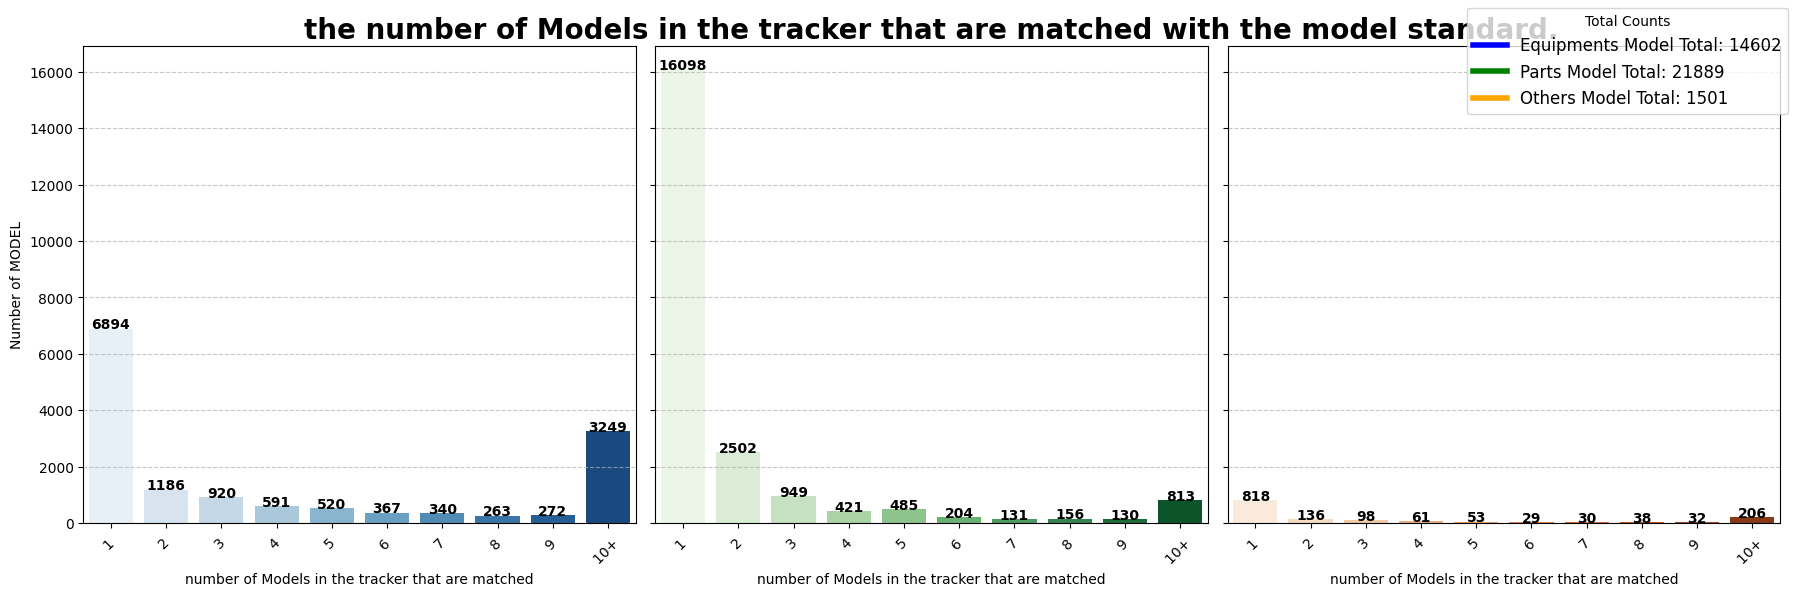

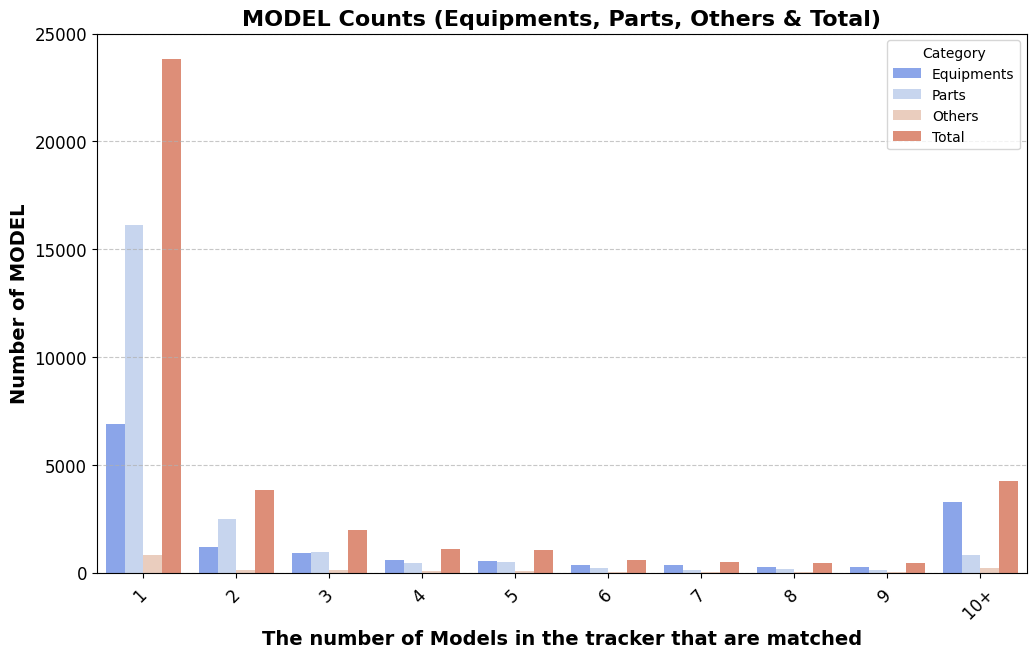

In [21]:
# Prevent negative sign issues
plt.rcParams["axes.unicode_minus"] = False

# Define function to filter and compute bin counts
def get_bin_counts(tracker_info, category_list, category_name):
    filtered_df = tracker_info[tracker_info["Category_Name"].isin(category_list)]
    filtered_df = filtered_df[filtered_df["STD_MODEL_YN"] == "Y"]

    model_counts = filtered_df["MODEL_ID"].value_counts()

    # Define bins (1 to 10 occurrences, and 10+ occurrences)
    max_count = model_counts.max()
    bins = list(range(1, 11))  # 1~10까지 기본 bin
    if max_count > 10:
        bins.append(max_count)  # 10개 이상 구분을 위해 추가

    bin_labels = [f"{i} " for i in range(1, 10)] + ["10+ "]

    # Ensure bins are strictly increasing
    bins = sorted(set(bins))  

    # Assign each count to a bin
    bin_indices = np.digitize(model_counts, bins, right=True) - 1
    bin_indices = np.clip(bin_indices, 0, len(bin_labels) - 1)  # Ensure no negative values

    # Count the number of MODEL_IDs in each bin
    bin_counts = np.bincount(bin_indices, minlength=len(bin_labels))

    return pd.DataFrame({"Category": category_name, "Bin": bin_labels, "Count": bin_counts})

# Compute bin counts for each category
df_equipments = get_bin_counts(tracker_info, equipment_category, "Equipments")
df_parts = get_bin_counts(tracker_info, parts_category, "Parts")
df_others = get_bin_counts(tracker_info, others_category, "Others")

# Compute total count for legend
equipments_total = df_equipments["Count"].sum()
parts_total = df_parts["Count"].sum()
others_total = df_others["Count"].sum()

# 🎨 Individual plots with count labels
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for Equipments
sns.barplot(data=df_equipments, x="Bin", y="Count", hue="Bin", palette="Blues", legend=False, ax=axes[0])
axes[0].set_title("", fontsize=20, fontweight="bold")
for i, row in df_equipments.iterrows():
    axes[0].text(i, row["Count"] + 1, str(row["Count"]), ha="center", fontsize=10, fontweight="bold")

# Plot for Parts
sns.barplot(data=df_parts, x="Bin", y="Count", hue="Bin", palette="Greens", legend=False, ax=axes[1])
axes[1].set_title("the number of Models in the tracker that are matched with the model standard.", fontsize=20, fontweight="bold")
for i, row in df_parts.iterrows():
    axes[1].text(i, row["Count"] + 1, str(row["Count"]), ha="center", fontsize=10, fontweight="bold")

# Plot for Others
sns.barplot(data=df_others, x="Bin", y="Count", hue="Bin", palette="Oranges", legend=False, ax=axes[2])
axes[2].set_title("", fontsize=20, fontweight="bold")
for i, row in df_others.iterrows():
    axes[2].text(i, row["Count"] + 1, str(row["Count"]), ha="center", fontsize=10, fontweight="bold")

for ax in axes:
    ax.set_xticks(range(len(df_equipments["Bin"])))  # Fix ticks first
    ax.set_xticklabels(df_equipments["Bin"], rotation=45)
    ax.set_xlabel("number of Models in the tracker that are matched")
    ax.set_ylabel("Number of MODEL")
    ax.grid(axis="y", linestyle="--", alpha=0.7)

# 🎨 범례 추가 (각 카테고리 총합)
handles = [
    plt.Line2D([0], [0], color="blue", lw=4, label=f"Equipments Model Total: {equipments_total}"),
    plt.Line2D([0], [0], color="green", lw=4, label=f"Parts Model Total: {parts_total}"),
    plt.Line2D([0], [0], color="orange", lw=4, label=f"Others Model Total: {others_total}"),
]
fig.legend(handles=handles, loc="upper right", fontsize=12, title="Total Counts")

plt.tight_layout()
plt.show()

df_total = pd.concat([df_equipments, df_parts, df_others])
df_total_grouped = df_total.groupby("Bin", as_index=False)["Count"].sum()
df_total_grouped["Category"] = "Total"

# Combine all for final visualization
df_final = pd.concat([df_total, df_total_grouped])

# 🎨 Combined plot with hue and count labels
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=df_final, x="Bin", y="Count", hue="Category", palette="coolwarm")

# for i, row in df_final.iterrows():
#     ax.text(i % len(df_final["Bin"].unique()), row["Count"] + 1, str(row["Count"]), ha="center", fontsize=10, fontweight="bold")

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("The number of Models in the tracker that are matched", fontsize=14, fontweight="bold")
plt.ylabel("Number of MODEL", fontsize=14, fontweight="bold")
plt.title("MODEL Counts (Equipments, Parts, Others & Total)", fontsize=16, fontweight="bold")
plt.legend(title="Category")
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add horizontal grid lines

plt.show()


- tracker에서 장비 model과 매칭되는 개수 : 14,602 standard model 장비의 개수 : 17,383
- tracker에서 부품 model과 매칭되는 개수 : 21,889 standard model 부품의 개수 : 366,470
- tracker에서 others model과 매칭되는 개수 : 1,501 standard model others의 개수 : 1,744

### Unknown 처리
스탠다드모델임에도 불구하고 unknown 데이터가 544개로 상당수 있었음. 불필요하다고 판단되어 삭제 할예정

In [24]:
#(equipments_model_df.applymap(lambda x: str(x).lower() == "unknown")).sum()
equipments_model_df = equipments_model_df.replace("unknown", np.nan).dropna()

In [25]:
#(new_model_df.applymap(lambda x: str(x).lower() == "unknwon")).sum()
equipments_model_df = equipments_model_df.replace("unknwon", np.nan).dropna()

In [26]:
#(new_model_df.applymap(lambda x: str(x).lower() == "unkown")).sum()
equipments_model_df = equipments_model_df.replace("unkown", np.nan).dropna()

In [27]:
#(new_model_df.applymap(lambda x: str(x).lower() == "unkonwn")).sum()
equipments_model_df = equipments_model_df.replace("unkonwn", np.nan).dropna()

In [38]:
client = MilvusClient("../../DB/milvus1.db")

In [28]:
equipments_model_df

,modelID,modelSTDName,MakerID,modelAlias,category,new_alias
4,MO886711,CUWLS-080,MA252842,CUWLS-080,PKG ETC,[CUWLS-080]
8,MO345734,OS-OVN11-CL05,MA2817,OS-OVN11-CL05,PKG ETC,[OS-OVN11-CL05]
9,MO299924,OS-OVN11-CL01W,MA2817,"OS OVN11CL01W,OS_OVN11CL01W,OSOVN11CL01W,OS-OV...",PKG ETC,"[OS OVN11CL01W, OS_OVN11CL01W, OSOVN11CL01W, O..."
10,MO333933,OS-OVN11-C02,MA2817,OS-OVN11-C02,PKG ETC,[OS-OVN11-C02]
11,MO886710,CURWA-530,MA252842,CURWA-530,PKG ETC,[CURWA-530]
...,...,...,...,...,...,...
385608,MO6090,DMC200A,MA2737,DMC200A,PKG ETC,[DMC200A]
385609,MO5986,NEWVIEW600,MA2608,NEWVIEW600,PKG ETC,[NEWVIEW600]
385610,MO6690,TCT-62LMV,MA622,TCT-62LMV,PKG ETC,[TCT-62LMV]
385611,MO954,FAD2200,MA1487,FAD2200,PKG ETC,[FAD2200]


### BM25란?

**BM25**는 **검색 엔진에서 문서를 순위화하는 알고리즘**임.  
쉽게 말하면, **사용자가 입력한 검색어와 가장 관련성이 높은 문서를 찾는 방법**임.



### BM25의 핵심 개념

1. **단어가 많이 나오면 중요함!**  
   - 검색어(키워드)가 문서에서 여러 번 나오면, 그 문서는 검색어와 더 관련이 있다고 판단함.

2. **너무 많이 나오면 오히려 덜 중요해짐!**  
   - 예를 들어, "축구"라는 단어가 100번 나왔다고 해서 무조건 중요한 것은 아님.  
   - 특정 단어가 너무 자주 등장하면 **중복된 정보일 가능성이 높으므로 가중치를 낮춤**.

3. **짧은 문서일수록 검색어가 더 중요함!**  
   - 예를 들어, **"축구란?"** 이라는 짧은 문서에서 "축구"가 3번 나오면 굉장히 중요한 단어임.  
   - 반면, **"축구 역사 및 규칙에 대한 논문"** 같은 긴 문서에서 3번 나왔다면 덜 중요할 수도 있음.



### BM25는 어디에 쓰일까?

-  **구글 검색 엔진** → 사용자가 입력한 검색어와 관련된 웹 페이지 찾기  
-  **전자상거래 (예: 쿠팡, 아마존)** → 고객이 원하는 상품을 빠르게 추천 
-  **챗봇 & AI** → 사용자가 입력한 질문과 가장 관련 있는 문서를 찾아 답변 제공 



### 결론

BM25는 **검색어와 문서의 관련성을 분석하여 순위를 매기는 알고리즘**임.  
즉, **"이 문서가 검색어와 얼마나 잘 맞는지?"** 를 판단하는 방법이라고 생각하면 됨! 😊


# Text Search

In [ ]:
equipments = set()

for _, row in equipments_model_df.iterrows():
    # modelSTDName, modelAlias에서 "Unknown" 처리
    model_std_name = str(row["modelSTDName"]) if row["modelSTDName"] is not None else ""
    model_alias = str(row["modelAlias"]) if row["modelAlias"] is not None else ""

    # "Unknown"만 있는 경우 None으로 변경, 그렇지 않으면 "Unknown" 삭제
    model_std_name = None if model_std_name.lower().strip() == "unknown" else model_std_name.replace("Unknown", "").strip()
    model_alias = None if model_alias.lower().strip() == "unknown" else model_alias.replace("Unknown", "").strip()

    # model_alias 길이를 450자로 제한
    if model_alias:
        model_alias = model_alias[:460]

    # 각 행(row)의 데이터를 튜플로 저장
    equipment_tuple = (
        row["modelID"],
        #model_std_name,
        #row["MakerID"],
        model_alias,
        row["category"]
    )

    # 튜플을 equipments에 추가
    equipments.add(equipment_tuple)

# 튜플을 문자열로 변환 (길이 제한 X)
docs = [" ".join(map(str, doc)) for doc in equipments]


In [44]:
docs

['MO242555 Summit RTP',
 'MO2943 X6UW-UNR Metrology',
 'MO2134 S-4200 Metrology',
 'MO2727 Unity2e 855SS Etch',
 'MO29452 MSR XL HD16 Chip Mounter',
 'MO239858 None PKG ETC',
 'MO357628 SH4-913024 ATE ETC',
 'MO344397 c.Oxidator200 Furnace',
 'MO343393 TW360 Handler',
 'MO238280 VDF-150MA Furnace',
 'MO248162 ANT-20 ATE ETC',
 'MO591 CPS-100VX Die Bonder',
 'MO14716 UA3150 Asher',
 'MO14754 DD-833V-8B Furnace',
 'MO344010 LLC1-51V-3 PKG ETC',
 'MO451 Centura Enabler Etch',
 'MO124331 4524D Wire Bonder',
 'MO60308 13-986-150 ATE ETC',
 'MO288279 Z-CONNECTION-PRINT EQUIPPED PKG ETC',
 'MO84742 SM131216-XY PKG ETC',
 'MO236648 ICONN ProCu Wire Bonder',
 'MO238408 FAaST 300SL Metrology',
 'MO3038 ZYNZILATOR WET',
 'MO278153 N4X Fab Others',
 'MO6881 M800 WET',
 'MO353451 YSM40R Chip Mounter',
 'MO374912 HXATL-1000 PKG ETC',
 'MO24959 VF-5300 Furnace',
 'MO43415 DJ-853D Furnace',
 'MO9620 IVS135 Metrology',
 'MO752813 XTR-2020-MV Fab Others',
 'MO754572 SC3000 Fab Others',
 'MO6561 DFG-83H/

In [45]:
# varchar를 512로 진행했는데 문장의 길이가 엄청긴 것들이 있다.
# 자리바뀌는 정도의 변경이어서 512로 잘라내어도 충분할것으로 보인다.
for i, text in enumerate(docs):
    if 512<len(text):
        print(f"🔹 {i+1}번째 문장 길이: {len(text)}")
        print(docs[i])

In [46]:
from milvus_model.hybrid import BGEM3EmbeddingFunction

ef = BGEM3EmbeddingFunction(use_fp16=False, device="cuda")
dense_dim = ef.dim["dense"]

# Generate embeddings using BGE-M3 model
docs_embeddings = ef(docs)

/workspace/Large_languige_model/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
pre tokenize: 100%|██████████| 1072/1072 [00:00<00:00, 3232.93it/s]
You're using a XLMRobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
Inference Embeddings: 100%|██████████| 1072/1072 [00:07<00:00, 139.22it/s]


- return 밀집백터, sparse 2가지 백터를 뱉어냄
- 밀집(Dense) 벡터	모든 차원에 값이 있는 벡터	[0.1, 0.2, 0.3, ..., 0.5]
- 희소(Sparse) 벡터	대부분 0이고, 중요한 값만 저장	{(10, 0.4), (500, 0.8), (2000, 0.3)}

In [47]:
from pymilvus import (
    connections,
    utility,
    FieldSchema,
    CollectionSchema,
    DataType,
    Collection,
)

connections.connect(uri="./milvus.db")

fields = [
    # Use auto generated id as primary key
    FieldSchema(
        name="pk", dtype=DataType.VARCHAR, is_primary=True, auto_id=True, max_length=100
    ),
    # Store the original text to retrieve based on semantically distance
    FieldSchema(name="text", dtype=DataType.VARCHAR, max_length=512),
    # Milvus now supports both sparse and dense vectors,
    # we can store each in a separate field to conduct hybrid search on both vectors
    FieldSchema(name="sparse_vector", dtype=DataType.SPARSE_FLOAT_VECTOR),
    FieldSchema(name="dense_vector", dtype=DataType.FLOAT_VECTOR, dim=dense_dim),
]
schema = CollectionSchema(fields)

col_name = "stardard_model"
if utility.has_collection(col_name):
    Collection(col_name).drop()
col = Collection(col_name, schema, consistency_level="Strong")

sparse_index = {"index_type": "SPARSE_INVERTED_INDEX", "metric_type": "IP"}
col.create_index("sparse_vector", sparse_index)
dense_index = {"index_type": "AUTOINDEX", "metric_type": "IP"}
col.create_index("dense_vector", dense_index)
col.load()


- Sparse vector
input (G4)
- MO252 AIX 2800G4 HT MA78 2800 G4HT,2800G4-HT 6x6",2800G4-HT parts,AIX 2800G4 HT,AIX2800 G4 HT,AIX2800 G4HT,AIX2800G4HT,G4 2800HT MoCVD',
- "G4"	✅ 가능	"AIX 2800G4 HT"에서 분리된 경우 검색 가능
- "G4HT"	⚠️ 부분 가능	"G4HT"가 하나의 단어로 인식되면 검색 어려움
- "2800G4HT"	❌ 어려움	"2800G4HT"가 하나의 단어로 처리되면 검색되지 않을 가능성이 큼
- "AIX"	✅ 가능	TF-IDF/BM25에서 높은 중요도를 가질 가능성이 큼
- "2800G4"	⚠️ 부분 가능	"2800G4 HT"처럼 분리된 경우 검색 가능, 안 분리되면 검색 어려움

In [48]:
for i in range(0, len(docs), 50):
    batched_entities = [
        docs[i : i + 50],
        docs_embeddings["sparse"][i : i + 50],
        docs_embeddings["dense"][i : i + 50],
    ]
    col.insert(batched_entities)
print("Number of entities inserted:", col.num_entities)


Number of entities inserted: 17143


# search Define

In [49]:
from pymilvus import (
    AnnSearchRequest,
    WeightedRanker,
)


def dense_search(col, query_dense_embedding, limit=5, cutoff=0.1):
    search_params = {"metric_type": "IP", "params": {}}
    res = col.search(
        [query_dense_embedding],
        anns_field="dense_vector",
        limit=limit,
        output_fields=["text"],
        param=search_params,
    )[0]
    return [hit.get("text") for hit in res if hit.distance >= cutoff]


def sparse_search(col, query_sparse_embedding, limit=5, cutoff=0.1):
    search_params = {
        "metric_type": "IP",
        "params": {},
    }
    res = col.search(
        [query_sparse_embedding],
        anns_field="sparse_vector",
        limit=limit,
        output_fields=["text"],
        param=search_params,
    )[0]
    return [hit.get("text") for hit in res if hit.distance >= cutoff]


def hybrid_search(
    col,
    query_dense_embedding,
    query_sparse_embedding,
    sparse_weight=1.0,
    dense_weight=1.0,
    limit=5,
    cutoff=0.1
):
    dense_search_params = {"metric_type": "IP", "params": {}}
    dense_req = AnnSearchRequest(
        [query_dense_embedding], "dense_vector", dense_search_params, limit=limit
    )
    sparse_search_params = {"metric_type": "IP", "params": {}}
    sparse_req = AnnSearchRequest(
        [query_sparse_embedding], "sparse_vector", sparse_search_params, limit=limit
    )
    rerank = WeightedRanker(sparse_weight, dense_weight)
    res = col.hybrid_search(
        [sparse_req, dense_req], rerank=rerank, limit=limit, output_fields=["text"]
    )[0]
    return [hit.get("text") for hit in res if hit.distance >= cutoff]

In [54]:
new_equipments_model_df=new_model_df[new_model_df['category'].isin(equipment_category)]
new_equipments_model_df[:30]

,modelID,modelSTDName,MakerID,category,modelAlias
21,MO886711,CUWLS-080,MA252842,PKG ETC,CUWLS-080
25,MO345734,OS-OVN11-CL05,MA2817,PKG ETC,OS-OVN11-CL05
26,MO299924,OS-OVN11-CL01W,MA2817,PKG ETC,OS OVN11CL01W
27,MO299924,OS-OVN11-CL01W,MA2817,PKG ETC,OS_OVN11CL01W
28,MO299924,OS-OVN11-CL01W,MA2817,PKG ETC,OSOVN11CL01W
29,MO299924,OS-OVN11-CL01W,MA2817,PKG ETC,OS-OVN11-CL01W
30,MO333933,OS-OVN11-C02,MA2817,PKG ETC,OS-OVN11-C02
31,MO886710,CURWA-530,MA252842,PKG ETC,CURWA-530
32,MO886713,CB-C-22,MA273101,PKG ETC,CB-C-22
39,MO868747,NXT2000-AM,MA1538,SMT ETC,NXT2000-AM


In [60]:
query_embeddings = ef(["2300KIYO FX E6"])
sparse_results = sparse_search(col, query_embeddings["sparse"][[0]],cutoff=0)
sparse_results

['MO374438 2300 e6 Kiyo FX Etch',
 'MO884684 2300 e6 Kiyo FX Chamber Etch',
 'MO273177 2300 Flex FX Etch',
 'MO289994 Stratus S300 FX ECD',
 'MO284879 2300 Flex FX Chamber Etch']

In [62]:
query_embeddings = ef(["OS-OVN11-CL05"])
hybrid_results = hybrid_search(
    col,
    query_embeddings["dense"][0],
    query_embeddings["sparse"][[0]],
    sparse_weight=0.7,
    dense_weight=1.0,
)
hybrid_results

['MO345734 OS-OVN11-CL05 PKG ETC',
 'MO235556 OS-OVN11-CL02 PKG ETC',
 'MO235557 OS-OVN11-CL03 PKG ETC',
 'MO115126 OS-OVN11-CL02F PKG ETC',
 'MO299924 OS-OVN11-CL01W PKG ETC']

# 시험테스트

In [43]:
# Enter your search query
query = input("Enter your search query: ")
print(query)

# Generate embeddings for the query
query_embeddings = ef([query])
# print(query_embeddings)

aix


In [68]:
dense_results = dense_search(col, query_embeddings["dense"][0])
sparse_results = sparse_search(col, query_embeddings["sparse"][[0]])
hybrid_results = hybrid_search(
    col,
    query_embeddings["dense"][0],
    query_embeddings["sparse"][[0]],
    sparse_weight=0.7,
    dense_weight=1.0,
)

In [69]:
unknown_df = tracker_info[
    (tracker_info["STD_MODEL_YN"] == "Y") & (tracker_info["Category_Name"] == "Fab Others")
]
unknown_df.iloc[10:]

,Category_Code,Category_Name,MAKER_ID,MAKER_NAME,MODEL_ID,MODEL_NAME,Process_NM,Configuration,SERIAL_NO,VINTAGE,...,Seller,Owner,USER_FAB_ID,COUNTRY_CD,P&C,CODE,STD_MODEL_YN,STD_MAKER_YN,Process(model Info),config(model Info)
7406,COMPONENT,Fab Others,MA1561,Nikon,MO8808,Unknown,Remote controller,Module : Photo Tool Deconed(O)Tool Deinstalled...,NaN,NaN,...,GES Associates LLC,Texas Instruments Semiconductor Manufacturing ...,NaN,NaN,N,RCL302,Y,Y,NaN,NaN
7412,COMPONENT,Fab Others,MA18089,Asyst,MO1369,LPT2200,－,－,ー,NaN,...,"Sumitomo Mitsui Finance and Leasing Co., Ltd.","Sony Semiconductor Manufacturing Co., Ltd.",NaN,NaN,Y,NaN,Y,Y,NaN,NaN
8005,COMPONENT,Fab Others,MA2088,SSEC,MO178099,3302,high water washer,Handle idle (production machine) Support 12 in...,NaN,NaN,...,Siliconware Precision Ind. Co. Ltd.,Siliconware Precision Ind. Co. Ltd.,NaN,TW,N,JSCR03,Y,Y,NaN,NaN
8147,COMPONENT,Fab Others,MA729,Fortrend,MO373685,LAMINA 203,NaN,NaN,NaN,NaN,...,Intel Corporation,Intel Corporation,NaN,US,N,NaN,Y,Y,MASK HANDLING TOOL,NaN
9541,COMPONENT,Fab Others,MA667,EV GROUP,MO932,EVG640,Mask Aligner,NaN,NaN,NaN,...,Macquarie Electronics USA Inc.,"Qorvo, Inc",NaN,GB,Y,NaN,Y,Y,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669301,COMPONENT,Fab Others,MA1446,MKS,MO241300,Part,MKS parts for the ASP+,NaN,NaN,NaN,...,Pascal,"SurplusGLOBAL, Inc.",NaN,KR,Y,NaN,Y,Y,NaN,NaN
669402,COMPONENT,Fab Others,MA1446,MKS,MO241300,Part,[Part]MKS parts 2set,"Auto Match, Magnetron,도파관,Etc.,",EB85,1999,...,"SurplusGLOBAL, Inc.","SurplusGLOBAL, Inc.",NaN,KR,Y,NaN,Y,Y,NaN,NaN
672820,COMPONENT,Fab Others,MA2729,DAIHEN,MO37129,CMC-10,NaN,Qty : 3 / Title : DAIHEN CMC-10 AUTO TUNE CONT...,NaN,NaN,...,"Capitol Area Technology, LLC.","Capitol Area Technology, LLC.",NaN,US,Y,NaN,Y,Y,NaN,NaN
674285,COMPONENT,Fab Others,MA272815,WTC binder,MO343855,78532,Etch,NaN,990063,2000,...,GLOBALFOUNDRIES U.S. Inc.,GLOBALFOUNDRIES U.S. Inc.,NaN,SG,N,OVEN-AC2,Y,Y,NaN,NaN


In [64]:
equipments_tracker_df=tracker_info[tracker_info['Category_Name'].isin(equipment_category)]
equipments_tracker_df

,Category_Code,Category_Name,MAKER_ID,MAKER_NAME,MODEL_ID,MODEL_NAME,Process_NM,Configuration,SERIAL_NO,VINTAGE,...,Seller,Owner,USER_FAB_ID,COUNTRY_CD,P&C,CODE,STD_MODEL_YN,STD_MAKER_YN,Process(model Info),config(model Info)
1,REFLOW_SOLDERING,Reflow&Soldering,MA752,Furukawa,MO6845,XNIII-725PCG,Reflow oven_,NaN,X04597,2000,...,JINUTEC CORPORATION,JINUTEC CORPORATION,NaN,NaN,N,NaN,Y,Y,NaN,NaN
3,CHIP_MOUNTER,Chip Mounter,MA740,Fuji,MO588,CP-842E,Chip mounter,NaN,538,2004,...,DHC,DHC,NaN,NaN,N,NaN,Y,Y,NaN,NaN
4,DICING_SAW,Dicing Saw,MA522,Disco,MO719,DFD640,Wafer Saw,Including CSP Function,EL1403,1996,...,SEMI RUN,SEMI RUN,NaN,KR,N,NaN,Y,Y,NaN,NaN
105,WIRE_BONDER,Wire Bonder,MA179,ASM,MO430,Eagle60,Wire Bonder,NaN,E649-028,2008,...,"ENERCORE CO., LTD.","ENERCORE CO., LTD.",NaN,KR,N,NaN,Y,Y,Wire Bonding,NaN
206,WIRE_BONDER,Wire Bonder,MA179,ASM,MO430,Eagle60,Wire Bonder,NaN,E626-031,2005,...,"ENERCORE CO., LTD.","ENERCORE CO., LTD.",NaN,KR,N,NaN,Y,Y,Wire Bonding,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674632,PVD,PVD,MA110,AMAT,MO869,Endura 2,METAL,OEM: AMAT Tool Model: Endura2 Software Versi...,NaN,2004,...,Macquarie Asset Finance Japan Limited,"Micron Memory Taiwan Co., Ltd.",NaN,TW,N,NaN,Y,Y,Metal Deposition,"EFEM, TM, Dual Degas, Process Chambers (ALPS, ..."
674633,PVD,PVD,MA110,AMAT,MO869,Endura 2,NaN,OEM: AMAT Tool Model: Endura2 Software Versi...,NaN,NaN,...,Macquarie Asset Finance Japan Limited,"Micron Memory Taiwan Co., Ltd.",NaN,TW,N,216821,Y,Y,Metal Deposition,"EFEM, TM, Dual Degas, Process Chambers (ALPS, ..."
674634,PVD,PVD,MA110,AMAT,MO869,Endura 2,NaN,NaN,NaN,NaN,...,Macquarie Asset Finance Japan Limited,"Micron Memory Taiwan Co., Ltd.",NaN,TW,N,220939,Y,Y,Metal Deposition,"EFEM, TM, Dual Degas, Process Chambers (ALPS, ..."
674635,PVD,PVD,MA110,AMAT,MO869,Endura 2,NaN,NaN,NaN,NaN,...,Macquarie Asset Finance Japan Limited,"Micron Technology Taiwan, Inc.",NaN,TW,N,220938,Y,Y,Metal Deposition,"EFEM, TM, Dual Degas, Process Chambers (ALPS, ..."


In [65]:
from tqdm import tqdm
i = 0


for eq_name, eq_id in tqdm(equipments_tracker_df[equipments_tracker_df["STD_MODEL_YN"] == "Y"][["MODEL_NAME", "MODEL_ID"]].values[:1000]):
    try:
        # eq_name이 int인 경우 감지 & 오류 출력
        if isinstance(eq_name, int):
            raise ValueError(f"⚠ 오류: MODEL_NAME({eq_name})이 int 타입입니다!")

        eq_name = str(eq_name)  # 문자열로 변환
        #print(eq_name, eq_id)

        # 검색 수행
        query_embeddings = ef([eq_name])
        sparse_results = sparse_search(col, query_embeddings["sparse"][[0]])
        #print(sparse_results)

        # 결과 분석
        keyword = sparse_results[0].split(" ")[0] if sparse_results else None
        #print(keyword)
        if keyword == eq_id:
            i += 1
        else:
            print(f"🚨 트래커 모델이름: {eq_name}, 트래커 모델아이디: {eq_id}, search가 찾은 값: {keyword}")

    except ValueError as e:
        print(f"❌ {e}")  # `eq_name`이 int였을 때 오류 메시지 출력
    except Exception:
        print(f"❌ standard model 못찾음: {eq_name}, {eq_id}")
        

print(f"✅ 일치하는 모델 수: {i}")


  2%|▏         | 18/1000 [00:00<00:30, 32.47it/s]

🚨 트래커 모델이름: Eagle10, 트래커 모델아이디: MO426, search가 찾은 값: None
🚨 트래커 모델이름: AIT XUV, 트래커 모델아이디: MO247, search가 찾은 값: MO243


  3%|▎         | 26/1000 [00:00<00:29, 33.27it/s]

🚨 트래커 모델이름: AIT XUV, 트래커 모델아이디: MO247, search가 찾은 값: MO243
🚨 트래커 모델이름: AIT XUV, 트래커 모델아이디: MO247, search가 찾은 값: MO243
🚨 트래커 모델이름: Unknown, 트래커 모델아이디: MO15308, search가 찾은 값: None
🚨 트래커 모델이름: Unknown, 트래커 모델아이디: MO15308, search가 찾은 값: None
🚨 트래커 모델이름: Unknown, 트래커 모델아이디: MO15308, search가 찾은 값: None
🚨 트래커 모델이름: Producer S, 트래커 모델아이디: MO1976, search가 찾은 값: MO295653


  3%|▎         | 34/1000 [00:01<00:28, 33.95it/s]

🚨 트래커 모델이름: MarkVz, 트래커 모델아이디: MO1484, search가 찾은 값: None
🚨 트래커 모델이름: FPA-3000i5, 트래커 모델아이디: MO1013, search가 찾은 값: MO284629
🚨 트래커 모델이름: CV8000, 트래커 모델아이디: MO605, search가 찾은 값: MO184387


  4%|▍         | 42/1000 [00:01<00:27, 34.86it/s]

🚨 트래커 모델이름: S-8820, 트래커 모델아이디: MO2159, search가 찾은 값: MO2160
🚨 트래커 모델이름: P5000, 트래커 모델아이디: MO1818, search가 찾은 값: MO234274
🚨 트래커 모델이름: Endura, 트래커 모델아이디: MO849, search가 찾은 값: MO311391


  5%|▌         | 50/1000 [00:01<00:27, 34.93it/s]

🚨 트래커 모델이름: EVG850, 트래커 모델아이디: MO933, search가 찾은 값: MO207186
🚨 트래커 모델이름: FPA-2500i3, 트래커 모델아이디: MO1005, search가 찾은 값: MO1003


  6%|▌         | 62/1000 [00:01<00:26, 35.52it/s]

🚨 트래커 모델이름: SS-W80A-A, 트래커 모델아이디: MO2404, search가 찾은 값: MO339665
🚨 트래커 모델이름: SS-W80A-A, 트래커 모델아이디: MO2404, search가 찾은 값: MO339665
🚨 트래커 모델이름: SS-W80A-A, 트래커 모델아이디: MO2404, search가 찾은 값: MO339665
🚨 트래커 모델이름: MetaPULSE, 트래커 모델아이디: MO855, search가 찾은 값: MO789927


  7%|▋         | 74/1000 [00:02<00:25, 35.71it/s]

🚨 트래커 모델이름: SC-W60A-A, 트래커 모델아이디: MO286442, search가 찾은 값: MO329765
🚨 트래커 모델이름: SC-W636-C, 트래커 모델아이디: MO2210, search가 찾은 값: MO6588
🚨 트래커 모델이름: SC-W60A-A, 트래커 모델아이디: MO286442, search가 찾은 값: MO329765
🚨 트래커 모델이름: SC-W60A-A, 트래커 모델아이디: MO286442, search가 찾은 값: MO329765
🚨 트래커 모델이름: SC-W60A-AVG, 트래커 모델아이디: MO327168, search가 찾은 값: MO329765
🚨 트래커 모델이름: SC-W80A-A, 트래커 모델아이디: MO286445, search가 찾은 값: MO286441


  8%|▊         | 82/1000 [00:02<00:26, 34.56it/s]

🚨 트래커 모델이름: 80B, 트래커 모델아이디: MO6586, search가 찾은 값: None
🚨 트래커 모델이름: Mark8, 트래커 모델아이디: MO1481, search가 찾은 값: None


  9%|▉         | 90/1000 [00:02<00:26, 34.49it/s]

🚨 트래커 모델이름: MarkVz, 트래커 모델아이디: MO1484, search가 찾은 값: None
🚨 트래커 모델이름: MarkVz, 트래커 모델아이디: MO1484, search가 찾은 값: None
🚨 트래커 모델이름: MarkVz, 트래커 모델아이디: MO1484, search가 찾은 값: None


 10%|█         | 102/1000 [00:02<00:26, 34.31it/s]

🚨 트래커 모델이름: DD-802V-H, 트래커 모델아이디: MO667, search가 찾은 값: MO310395
🚨 트래커 모델이름: DJ-803V, 트래커 모델아이디: MO757, search가 찾은 값: MO103229
🚨 트래커 모델이름: DD-803V, 트래커 모델아이디: MO669, search가 찾은 값: MO14748
🚨 트래커 모델이름: DD-802V-H, 트래커 모델아이디: MO667, search가 찾은 값: MO310395
🚨 트래커 모델이름: DD-802V-H, 트래커 모델아이디: MO667, search가 찾은 값: MO310395
🚨 트래커 모델이름: Alpha-8S-C, 트래커 모델아이디: MO318, search가 찾은 값: MO322297


 11%|█         | 110/1000 [00:03<00:26, 33.45it/s]

🚨 트래커 모델이름: Alpha-8S-Z, 트래커 모델아이디: MO328, search가 찾은 값: MO297898
🚨 트래커 모델이름: VTR7000, 트래커 모델아이디: MO2871, search가 찾은 값: MO2872
🚨 트래커 모델이름: VTR7000, 트래커 모델아이디: MO2871, search가 찾은 값: MO2872
🚨 트래커 모델이름: VTR7000, 트래커 모델아이디: MO2871, search가 찾은 값: MO2872
🚨 트래커 모델이름: VTR7000, 트래커 모델아이디: MO2871, search가 찾은 값: MO2872
🚨 트래커 모델이름: VTR7000, 트래커 모델아이디: MO2871, search가 찾은 값: MO2872


 12%|█▏        | 122/1000 [00:03<00:25, 34.58it/s]

🚨 트래커 모델이름: CDE-7-3, 트래커 모델아이디: MO5500, search가 찾은 값: MO298528
🚨 트래커 모델이름: RAM-250, 트래커 모델아이디: MO233429, search가 찾은 값: MO280222
🚨 트래커 모델이름: RAM-250, 트래커 모델아이디: MO233429, search가 찾은 값: MO280222


 13%|█▎        | 130/1000 [00:03<00:25, 34.17it/s]

🚨 트래커 모델이름: PE-615, 트래커 모델아이디: MO5257, search가 찾은 값: MO5263
🚨 트래커 모델이름: M-308, 트래커 모델아이디: MO42999, search가 찾은 값: MO103778
🚨 트래커 모델이름: P5000, 트래커 모델아이디: MO1818, search가 찾은 값: MO234274


 14%|█▍        | 142/1000 [00:04<00:26, 32.98it/s]

🚨 트래커 모델이름: Ceraus Zi-1000, 트래커 모델아이디: MO494, search가 찾은 값: MO11116
🚨 트래커 모델이름: Ceraus Zi-1000, 트래커 모델아이디: MO494, search가 찾은 값: MO11116


 15%|█▌        | 154/1000 [00:04<00:25, 32.88it/s]

🚨 트래커 모델이름: P5000, 트래커 모델아이디: MO1845, search가 찾은 값: MO234274
🚨 트래커 모델이름: EPO-222, 트래커 모델아이디: MO885, search가 찾은 값: MO887


 16%|█▌        | 162/1000 [00:04<00:25, 32.85it/s]

🚨 트래커 모델이름: Unknown, 트래커 모델아이디: MO60297, search가 찾은 값: None
🚨 트래커 모델이름: Unknown, 트래커 모델아이디: MO60297, search가 찾은 값: None
🚨 트래커 모델이름: Unknown, 트래커 모델아이디: MO60297, search가 찾은 값: None
🚨 트래커 모델이름: Unknown, 트래커 모델아이디: MO60297, search가 찾은 값: None
🚨 트래커 모델이름: SS-W60A-A, 트래커 모델아이디: MO6591, search가 찾은 값: MO327564


 17%|█▋        | 174/1000 [00:05<00:25, 32.18it/s]

🚨 트래커 모델이름: KLA5100, 트래커 모델아이디: MO1306, search가 찾은 값: None
🚨 트래커 모델이름: SFS7600, 트래커 모델아이디: MO2273, search가 찾은 값: MO242366
🚨 트래커 모델이름: SFS7700, 트래커 모델아이디: MO2275, search가 찾은 값: MO242365


 19%|█▊        | 186/1000 [00:05<00:25, 32.28it/s]

🚨 트래커 모델이름: TREX-610, 트래커 모델아이디: MO2616, search가 찾은 값: MO231792


 22%|██▏       | 222/1000 [00:06<00:22, 34.05it/s]

🚨 트래커 모델이름: 4071A, 트래커 모델아이디: MO86, search가 찾은 값: None
🚨 트래커 모델이름: 4071A, 트래커 모델아이디: MO86, search가 찾은 값: None


 24%|██▍       | 242/1000 [00:07<00:22, 34.14it/s]

🚨 트래커 모델이름: 2300 Exelan Flex45, 트래커 모델아이디: MO47, search가 찾은 값: MO298075


 25%|██▌       | 250/1000 [00:07<00:21, 34.57it/s]

🚨 트래커 모델이름: UF3000, 트래커 모델아이디: MO2658, search가 찾은 값: MO334368
🚨 트래커 모델이름: UF3000, 트래커 모델아이디: MO2658, search가 찾은 값: MO334368
🚨 트래커 모델이름: Ag93000 C400, 트래커 모델아이디: MO282475, search가 찾은 값: MO284839
🚨 트래커 모델이름: Ag93000 C400, 트래커 모델아이디: MO282475, search가 찾은 값: MO284839


 26%|██▌       | 258/1000 [00:07<00:21, 34.48it/s]

🚨 트래커 모델이름: HT-9040, 트래커 모델아이디: MO234793, search가 찾은 값: MO234794
🚨 트래커 모델이름: HT-9040, 트래커 모델아이디: MO234793, search가 찾은 값: MO234794


 27%|██▋       | 270/1000 [00:08<00:21, 34.61it/s]

🚨 트래커 모델이름: V93000, 트래커 모델아이디: MO2806, search가 찾은 값: MO284834
🚨 트래커 모델이름: V93000 PS800, 트래커 모델아이디: MO2813, search가 찾은 값: MO39668
🚨 트래커 모델이름: SPA-300, 트래커 모델아이디: MO1839, search가 찾은 값: MO5522


 28%|██▊       | 278/1000 [00:08<00:21, 34.37it/s]

🚨 트래커 모델이름: SRT-1000, 트래커 모델아이디: MO6016, search가 찾은 값: None
🚨 트래커 모델이름: NSR-1505G6E, 트래커 모델아이디: MO1652, search가 찾은 값: MO235974
🚨 트래커 모델이름: NSR-1505G6E, 트래커 모델아이디: MO1652, search가 찾은 값: MO235974


 29%|██▉       | 294/1000 [00:08<00:20, 34.71it/s]

🚨 트래커 모델이름: MAXUM PLUS, 트래커 모델아이디: MO1493, search가 찾은 값: MO25174
🚨 트래커 모델이름: MAXUM PLUS, 트래커 모델아이디: MO1493, search가 찾은 값: MO25174
🚨 트래커 모델이름: OP-2600, 트래커 모델아이디: MO1771, search가 찾은 값: MO1772


 30%|███       | 302/1000 [00:08<00:20, 34.60it/s]

🚨 트래커 모델이름: M200, 트래커 모델아이디: MO1389, search가 찾은 값: None
🚨 트래커 모델이름: Unknown, 트래커 모델아이디: MO14486, search가 찾은 값: None
🚨 트래커 모델이름: Mark8, 트래커 모델아이디: MO1481, search가 찾은 값: None
🚨 트래커 모델이름: Mark8, 트래커 모델아이디: MO1481, search가 찾은 값: None


 31%|███       | 310/1000 [00:09<00:20, 34.35it/s]

🚨 트래커 모델이름: Mark8, 트래커 모델아이디: MO1481, search가 찾은 값: None
🚨 트래커 모델이름: Mark8, 트래커 모델아이디: MO1481, search가 찾은 값: None
🚨 트래커 모델이름: Mark8, 트래커 모델아이디: MO1481, search가 찾은 값: None
🚨 트래커 모델이름: Mark8, 트래커 모델아이디: MO1481, search가 찾은 값: None
🚨 트래커 모델이름: Mark8, 트래커 모델아이디: MO1481, search가 찾은 값: None
🚨 트래커 모델이름: Mark8, 트래커 모델아이디: MO1481, search가 찾은 값: None
🚨 트래커 모델이름: Mark8, 트래커 모델아이디: MO1481, search가 찾은 값: None


 31%|███▏      | 314/1000 [00:09<00:20, 34.29it/s]

🚨 트래커 모델이름: Mark8, 트래커 모델아이디: MO1481, search가 찾은 값: None
🚨 트래커 모델이름: Mark8, 트래커 모델아이디: MO1481, search가 찾은 값: None
🚨 트래커 모델이름: Mark8, 트래커 모델아이디: MO1481, search가 찾은 값: None
🚨 트래커 모델이름: Mark8, 트래커 모델아이디: MO1481, search가 찾은 값: None
🚨 트래커 모델이름: Mark8, 트래커 모델아이디: MO1481, search가 찾은 값: None
🚨 트래커 모델이름: Mark8, 트래커 모델아이디: MO1481, search가 찾은 값: None


 32%|███▏      | 322/1000 [00:09<00:19, 34.33it/s]

🚨 트래커 모델이름: ISLinDA, 트래커 모델아이디: MO274091, search가 찾은 값: None
🚨 트래커 모델이름: ISLinDA, 트래커 모델아이디: MO274091, search가 찾은 값: None
🚨 트래커 모델이름: Unknown, 트래커 모델아이디: MO86504, search가 찾은 값: None
🚨 트래커 모델이름: V93000, 트래커 모델아이디: MO2806, search가 찾은 값: MO284834
🚨 트래커 모델이름: V93000, 트래커 모델아이디: MO2806, search가 찾은 값: MO284834


 33%|███▎      | 330/1000 [00:09<00:19, 34.57it/s]

🚨 트래커 모델이름: V93000, 트래커 모델아이디: MO2806, search가 찾은 값: MO284834
🚨 트래커 모델이름: ISLinDA, 트래커 모델아이디: MO274091, search가 찾은 값: None


 34%|███▍      | 338/1000 [00:09<00:19, 34.44it/s]

🚨 트래커 모델이름: UF3000EX, 트래커 모델아이디: MO2659, search가 찾은 값: MO296728
🚨 트래커 모델이름: UF3000EX, 트래커 모델아이디: MO2659, search가 찾은 값: MO296728
🚨 트래커 모델이름: UF3000EX, 트래커 모델아이디: MO2659, search가 찾은 값: MO296728
🚨 트래커 모델이름: UF3000EX, 트래커 모델아이디: MO2659, search가 찾은 값: MO296728
🚨 트래커 모델이름: UF3000EX, 트래커 모델아이디: MO2659, search가 찾은 값: MO296728
🚨 트래커 모델이름: UF3000EX, 트래커 모델아이디: MO2659, search가 찾은 값: MO296728
🚨 트래커 모델이름: UF3000EX, 트래커 모델아이디: MO2659, search가 찾은 값: MO296728


 35%|███▍      | 346/1000 [00:10<00:19, 34.35it/s]

🚨 트래커 모델이름: UF3000EX, 트래커 모델아이디: MO2659, search가 찾은 값: MO296728
🚨 트래커 모델이름: UF3000EX, 트래커 모델아이디: MO2659, search가 찾은 값: MO296728
🚨 트래커 모델이름: UF3000EX, 트래커 모델아이디: MO2659, search가 찾은 값: MO296728
🚨 트래커 모델이름: UF3000EX, 트래커 모델아이디: MO2659, search가 찾은 값: MO296728
🚨 트래커 모델이름: UF3000EX, 트래커 모델아이디: MO2659, search가 찾은 값: MO296728
🚨 트래커 모델이름: UF3000EX, 트래커 모델아이디: MO2659, search가 찾은 값: MO296728
🚨 트래커 모델이름: UF3000EX, 트래커 모델아이디: MO2659, search가 찾은 값: MO296728


 35%|███▌      | 354/1000 [00:10<00:18, 34.28it/s]

🚨 트래커 모델이름: UF3000EX, 트래커 모델아이디: MO2659, search가 찾은 값: MO296728


 38%|███▊      | 378/1000 [00:10<00:11, 54.76it/s]

🚨 트래커 모델이름: ISLinDA, 트래커 모델아이디: MO274091, search가 찾은 값: None
❌ ⚠ 오류: MODEL_NAME(2017)이 int 타입입니다!
❌ ⚠ 오류: MODEL_NAME(2017)이 int 타입입니다!
❌ ⚠ 오류: MODEL_NAME(2017)이 int 타입입니다!
❌ ⚠ 오류: MODEL_NAME(2017)이 int 타입입니다!
❌ ⚠ 오류: MODEL_NAME(2017)이 int 타입입니다!
❌ ⚠ 오류: MODEL_NAME(2017)이 int 타입입니다!
❌ ⚠ 오류: MODEL_NAME(2017)이 int 타입입니다!
❌ ⚠ 오류: MODEL_NAME(2017)이 int 타입입니다!


 40%|███▉      | 399/1000 [00:11<00:15, 38.57it/s]

🚨 트래커 모델이름: T5371, 트래커 모델아이디: MO2478, search가 찾은 값: MO19891
🚨 트래커 모델이름: Ag93000 C400E, 트래커 모델아이디: MO2808, search가 찾은 값: MO282475
🚨 트래커 모델이름: V93000, 트래커 모델아이디: MO2806, search가 찾은 값: MO284834
🚨 트래커 모델이름: Ag93000 C400E, 트래커 모델아이디: MO2808, search가 찾은 값: MO282475
🚨 트래커 모델이름: Ag93000 C400E, 트래커 모델아이디: MO2808, search가 찾은 값: MO282475
🚨 트래커 모델이름: Ag93000 C400E, 트래커 모델아이디: MO2808, search가 찾은 값: MO282475


 40%|████      | 404/1000 [00:11<00:15, 39.54it/s]

🚨 트래커 모델이름: Ag93000 C400E, 트래커 모델아이디: MO2808, search가 찾은 값: MO282475
🚨 트래커 모델이름: 8800FC, 트래커 모델아이디: MO243199, search가 찾은 값: MO299910
❌ ⚠ 오류: MODEL_NAME(8800)이 int 타입입니다!
🚨 트래커 모델이름: 8800FC Quantum, 트래커 모델아이디: MO165, search가 찾은 값: MO299910
🚨 트래커 모델이름: 8800FC Quantum, 트래커 모델아이디: MO165, search가 찾은 값: MO299910
🚨 트래커 모델이름: 8800FC Quantum, 트래커 모델아이디: MO165, search가 찾은 값: MO299910
🚨 트래커 모델이름: DFD6360, 트래커 모델아이디: MO716, search가 찾은 값: MO338938


 42%|████▏     | 417/1000 [00:12<00:16, 35.98it/s]

🚨 트래커 모델이름: T5371, 트래커 모델아이디: MO2478, search가 찾은 값: MO19891
🚨 트래커 모델이름: 2008 HS, 트래커 모델아이디: MO241537, search가 찾은 값: None
🚨 트래커 모델이름: 2008 HS, 트래커 모델아이디: MO241537, search가 찾은 값: None
🚨 트래커 모델이름: CI-T120, 트래커 모델아이디: MO506, search가 찾은 값: MO249241
🚨 트래커 모델이름: CI-T120, 트래커 모델아이디: MO506, search가 찾은 값: MO249241
🚨 트래커 모델이름: CI-T120, 트래커 모델아이디: MO506, search가 찾은 값: MO249241
🚨 트래커 모델이름: CI-T120, 트래커 모델아이디: MO506, search가 찾은 값: MO249241


 50%|████▉     | 497/1000 [00:14<00:14, 33.78it/s]

🚨 트래커 모델이름: M550, 트래커 모델아이디: MO1423, search가 찾은 값: None


 60%|██████    | 601/1000 [00:17<00:11, 33.32it/s]

🚨 트래커 모델이름: M550, 트래커 모델아이디: MO1423, search가 찾은 값: None


 67%|██████▋   | 669/1000 [00:19<00:09, 33.65it/s]

🚨 트래커 모델이름: Y-1E, 트래커 모델아이디: MO235632, search가 찾은 값: None
🚨 트래커 모델이름: 2008 HS3, 트래커 모델아이디: MO1, search가 찾은 값: None
🚨 트래커 모델이름: 2008 HS3, 트래커 모델아이디: MO1, search가 찾은 값: None
🚨 트래커 모델이름: 2008 HS3, 트래커 모델아이디: MO1, search가 찾은 값: None
🚨 트래커 모델이름: 2008 HS3, 트래커 모델아이디: MO1, search가 찾은 값: None
🚨 트래커 모델이름: 2008 HS3, 트래커 모델아이디: MO1, search가 찾은 값: None
🚨 트래커 모델이름: 2008 HS3, 트래커 모델아이디: MO1, search가 찾은 값: None


 68%|██████▊   | 677/1000 [00:19<00:09, 33.46it/s]

🚨 트래커 모델이름: 2008 HS3, 트래커 모델아이디: MO1, search가 찾은 값: None
🚨 트래커 모델이름: 2008 HS3, 트래커 모델아이디: MO1, search가 찾은 값: None
🚨 트래커 모델이름: 2008 HS3, 트래커 모델아이디: MO1, search가 찾은 값: None
🚨 트래커 모델이름: 2008 HS3, 트래커 모델아이디: MO1, search가 찾은 값: None
🚨 트래커 모델이름: M550, 트래커 모델아이디: MO1423, search가 찾은 값: None


 68%|██████▊   | 685/1000 [00:20<00:09, 33.40it/s]

🚨 트래커 모델이름: M550, 트래커 모델아이디: MO1423, search가 찾은 값: None
🚨 트래커 모델이름: M550, 트래커 모델아이디: MO1423, search가 찾은 값: None
🚨 트래커 모델이름: SM321, 트래커 모델아이디: MO2328, search가 찾은 값: MO75427
🚨 트래커 모델이름: M550, 트래커 모델아이디: MO1423, search가 찾은 값: None
🚨 트래커 모델이름: M550, 트래커 모델아이디: MO1423, search가 찾은 값: None
🚨 트래커 모델이름: M550, 트래커 모델아이디: MO1423, search가 찾은 값: None
🚨 트래커 모델이름: FPA-5000ES3, 트래커 모델아이디: MO1020, search가 찾은 값: MO754879


 70%|██████▉   | 697/1000 [00:20<00:09, 33.09it/s]

🚨 트래커 모델이름: MD2000, 트래커 모델아이디: MO1503, search가 찾은 값: None
🚨 트래커 모델이름: SM321, 트래커 모델아이디: MO2328, search가 찾은 값: MO75427


 70%|███████   | 705/1000 [00:20<00:08, 33.20it/s]

🚨 트래커 모델이름: Part, 트래커 모델아이디: MO335248, search가 찾은 값: None
🚨 트래커 모델이름: Vector, 트래커 모델아이디: MO360, search가 찾은 값: MO330744
🚨 트래커 모델이름: YV88Xg, 트래커 모델아이디: MO3026, search가 찾은 값: MO3024
🚨 트래커 모델이름: SM321, 트래커 모델아이디: MO2328, search가 찾은 값: MO75427


 71%|███████   | 709/1000 [00:20<00:08, 33.20it/s]

🚨 트래커 모델이름: T5377, 트래커 모델아이디: MO2481, search가 찾은 값: MO19895
🚨 트래커 모델이름: Centura DPS Metal, 트래커 모델아이디: MO274713, search가 찾은 값: MO293165
🚨 트래커 모델이름: UF200S, 트래커 모델아이디: MO2655, search가 찾은 값: MO95799


 72%|███████▏  | 717/1000 [00:21<00:08, 33.23it/s]

🚨 트래커 모델이름: UF200, 트래커 모델아이디: MO2650, search가 찾은 값: MO280869
🚨 트래커 모델이름: UF200, 트래커 모델아이디: MO2650, search가 찾은 값: MO280869
🚨 트래커 모델이름: UF200S, 트래커 모델아이디: MO2655, search가 찾은 값: MO95799
🚨 트래커 모델이름: UF200, 트래커 모델아이디: MO2650, search가 찾은 값: MO280869
🚨 트래커 모델이름: UF200, 트래커 모델아이디: MO2650, search가 찾은 값: MO280869
🚨 트래커 모델이름: UF200, 트래커 모델아이디: MO2650, search가 찾은 값: MO280869


 72%|███████▎  | 725/1000 [00:21<00:08, 33.32it/s]

🚨 트래커 모델이름: UF200S, 트래커 모델아이디: MO2655, search가 찾은 값: MO95799
🚨 트래커 모델이름: OP-2600, 트래커 모델아이디: MO1771, search가 찾은 값: MO1772
🚨 트래커 모델이름: Unity SCCM, 트래커 모델아이디: MO2747, search가 찾은 값: MO340929


 74%|███████▎  | 737/1000 [00:21<00:07, 33.28it/s]

🚨 트래커 모델이름: Eagle10, 트래커 모델아이디: MO426, search가 찾은 값: None
🚨 트래커 모델이름: Endura, 트래커 모델아이디: MO849, search가 찾은 값: MO311391
🚨 트래커 모델이름: Centura WxZ, 트래커 모델아이디: MO479, search가 찾은 값: MO309418
🚨 트래커 모델이름: Centura WxZ, 트래커 모델아이디: MO479, search가 찾은 값: MO309418
🚨 트래커 모델이름: Centura WxZ, 트래커 모델아이디: MO479, search가 찾은 값: MO309418


 74%|███████▍  | 745/1000 [00:21<00:07, 33.29it/s]

🚨 트래커 모델이름: Unknown, 트래커 모델아이디: MO8808, search가 찾은 값: None
🚨 트래커 모델이름: Unknown, 트래커 모델아이디: MO8808, search가 찾은 값: None
🚨 트래커 모델이름: Unknown, 트래커 모델아이디: MO8808, search가 찾은 값: None
🚨 트래커 모델이름: Unknown, 트래커 모델아이디: MO8808, search가 찾은 값: None
🚨 트래커 모델이름: Unknown, 트래커 모델아이디: MO8808, search가 찾은 값: None


 75%|███████▌  | 753/1000 [00:22<00:07, 33.24it/s]

🚨 트래커 모델이름: Alpha-8SE-ZVS, 트래커 모델아이디: MO327, search가 찾은 값: MO34441
🚨 트래커 모델이름: S-8820, 트래커 모델아이디: MO2159, search가 찾은 값: MO2160


 76%|███████▋  | 765/1000 [00:22<00:07, 33.09it/s]

🚨 트래커 모델이름: DD-853V, 트래커 모델아이디: MO686, search가 찾은 값: MO688
🚨 트래커 모델이름: DD-835V, 트래커 모델아이디: MO682, search가 찾은 값: MO234685
🚨 트래커 모델이름: DD-853V, 트래커 모델아이디: MO686, search가 찾은 값: MO688
🚨 트래커 모델이름: DJ-853V, 트래커 모델아이디: MO788, search가 찾은 값: MO14778
🚨 트래커 모델이름: DJ-853V, 트래커 모델아이디: MO788, search가 찾은 값: MO14778
🚨 트래커 모델이름: DJ-835V, 트래커 모델아이디: MO784, search가 찾은 값: MO14774
🚨 트래커 모델이름: DD-853V, 트래커 모델아이디: MO686, search가 찾은 값: MO688


 77%|███████▋  | 773/1000 [00:22<00:06, 33.13it/s]

🚨 트래커 모델이름: DD-853V, 트래커 모델아이디: MO686, search가 찾은 값: MO688
🚨 트래커 모델이름: DD-853V, 트래커 모델아이디: MO686, search가 찾은 값: MO688
🚨 트래커 모델이름: DD-853V, 트래커 모델아이디: MO686, search가 찾은 값: MO688
🚨 트래커 모델이름: SE2000, 트래커 모델아이디: MO333443, search가 찾은 값: None
🚨 트래커 모델이름: MERCURY-MP, 트래커 모델아이디: MO851, search가 찾은 값: None


 78%|███████▊  | 785/1000 [00:23<00:06, 33.20it/s]

🚨 트래커 모델이름: Endura, 트래커 모델아이디: MO849, search가 찾은 값: MO311391
🚨 트래커 모델이름: Endura, 트래커 모델아이디: MO849, search가 찾은 값: MO311391
🚨 트래커 모델이름: SC-W80A-A, 트래커 모델아이디: MO286445, search가 찾은 값: MO286441
🚨 트래커 모델이름: FLX5400, 트래커 모델아이디: MO987, search가 찾은 값: MO24598
🚨 트래커 모델이름: RS75, 트래커 모델아이디: MO2115, search가 찾은 값: MO234587


 80%|███████▉  | 797/1000 [00:23<00:06, 33.21it/s]

🚨 트래커 모델이름: Centura DxZ, 트래커 모델아이디: MO443, search가 찾은 값: MO309418
🚨 트래커 모델이름: Centura WxZ, 트래커 모델아이디: MO479, search가 찾은 값: MO309418
🚨 트래커 모델이름: Centura DxZ, 트래커 모델아이디: MO443, search가 찾은 값: MO309418
🚨 트래커 모델이름: SP1 TBI, 트래커 모델아이디: MO276, search가 찾은 값: MO60182


 80%|████████  | 805/1000 [00:23<00:05, 33.23it/s]

🚨 트래커 모델이름: Unity2e 85DD, 트래커 모델아이디: MO2719, search가 찾은 값: MO320937
🚨 트래커 모델이름: P22, 트래커 모델아이디: MO1817, search가 찾은 값: None
🚨 트래커 모델이름: NSR-2205i14E2, 트래커 모델아이디: MO1681, search가 찾은 값: MO8768
🚨 트래커 모델이름: NSR-2205i14E2, 트래커 모델아이디: MO1681, search가 찾은 값: MO8768
🚨 트래커 모델이름: ACT8, 트래커 모델아이디: MO8, search가 찾은 값: MO287355


 81%|████████▏ | 813/1000 [00:23<00:05, 33.13it/s]

🚨 트래커 모델이름: ACT8, 트래커 모델아이디: MO8, search가 찾은 값: MO287355
🚨 트래커 모델이름: ACT8, 트래커 모델아이디: MO8, search가 찾은 값: MO287355
🚨 트래커 모델이름: KLA5200, 트래커 모델아이디: MO1308, search가 찾은 값: None
🚨 트래커 모델이름: AIT II, 트래커 모델아이디: MO244, search가 찾은 값: MO337148


 82%|████████▎ | 825/1000 [00:24<00:05, 33.28it/s]

🚨 트래커 모델이름: MA6, 트래커 모델아이디: MO1443, search가 찾은 값: None
🚨 트래커 모델이름: SB8e, 트래커 모델아이디: MO259275, search가 찾은 값: None
🚨 트래커 모델이름: Axiotron, 트래커 모델아이디: MO3223, search가 찾은 값: None
🚨 트래커 모델이름: Axiotron, 트래커 모델아이디: MO3223, search가 찾은 값: None
🚨 트래커 모델이름: 4073A, 트래커 모델아이디: MO90, search가 찾은 값: None


 83%|████████▎ | 833/1000 [00:24<00:05, 33.08it/s]

🚨 트래커 모델이름: UF200, 트래커 모델아이디: MO2650, search가 찾은 값: MO280869
🚨 트래커 모델이름: 4072A, 트래커 모델아이디: MO88, search가 찾은 값: None
🚨 트래커 모델이름: 4082A, 트래커 모델아이디: MO92, search가 찾은 값: MO255165
🚨 트래커 모델이름: 4082A, 트래커 모델아이디: MO92, search가 찾은 값: MO255165
🚨 트래커 모델이름: D10, 트래커 모델아이디: MO15477, search가 찾은 값: None


 85%|████████▍ | 847/1000 [00:24<00:03, 47.96it/s]

❌ ⚠ 오류: MODEL_NAME(238)이 int 타입입니다!
❌ ⚠ 오류: MODEL_NAME(236)이 int 타입입니다!
❌ ⚠ 오류: MODEL_NAME(236)이 int 타입입니다!
❌ ⚠ 오류: MODEL_NAME(236)이 int 타입입니다!
❌ ⚠ 오류: MODEL_NAME(236)이 int 타입입니다!
❌ ⚠ 오류: MODEL_NAME(236)이 int 타입입니다!
🚨 트래커 모델이름: STM6, 트래커 모델아이디: MO273200, search가 찾은 값: None
🚨 트래커 모델이름: Cheetah, 트래커 모델아이디: MO359772, search가 찾은 값: None


 86%|████████▌ | 857/1000 [00:25<00:03, 42.40it/s]

❌ ⚠ 오류: MODEL_NAME(236)이 int 타입입니다!
🚨 트래커 모델이름: F20, 트래커 모델아이디: MO61844, search가 찾은 값: None


 87%|████████▋ | 867/1000 [00:25<00:03, 37.32it/s]

🚨 트래커 모델이름: FE-VII, 트래커 모델아이디: MO979, search가 찾은 값: MO754472


 88%|████████▊ | 879/1000 [00:25<00:03, 34.64it/s]

🚨 트래커 모델이름: Alpha-303i, 트래커 모델아이디: MO281, search가 찾은 값: None
🚨 트래커 모델이름: Alpha-303i, 트래커 모델아이디: MO281, search가 찾은 값: None
🚨 트래커 모델이름: Alpha-303i, 트래커 모델아이디: MO281, search가 찾은 값: None
🚨 트래커 모델이름: Alpha-303i, 트래커 모델아이디: MO281, search가 찾은 값: None
🚨 트래커 모델이름: Alpha-303i, 트래커 모델아이디: MO281, search가 찾은 값: None
🚨 트래커 모델이름: Alpha-303i, 트래커 모델아이디: MO281, search가 찾은 값: None
🚨 트래커 모델이름: Indy, 트래커 모델아이디: MO1185, search가 찾은 값: None


 88%|████████▊ | 883/1000 [00:25<00:03, 34.14it/s]

🚨 트래커 모델이름: Indy, 트래커 모델아이디: MO1185, search가 찾은 값: None
🚨 트래커 모델이름: Indy, 트래커 모델아이디: MO1185, search가 찾은 값: None
🚨 트래커 모델이름: Indy Plus, 트래커 모델아이디: MO1186, search가 찾은 값: None
🚨 트래커 모델이름: Trias, 트래커 모델아이디: MO2621, search가 찾은 값: MO295063


 89%|████████▉ | 891/1000 [00:26<00:03, 33.43it/s]

🚨 트래커 모델이름: E500, 트래커 모델아이디: MO416, search가 찾은 값: MO61774
🚨 트래커 모델이름: Vector Express, 트래커 모델아이디: MO362, search가 찾은 값: None
🚨 트래커 모델이름: Vector Express, 트래커 모델아이디: MO362, search가 찾은 값: None


 91%|█████████ | 906/1000 [00:26<00:02, 40.84it/s]

❌ ⚠ 오류: MODEL_NAME(4000)이 int 타입입니다!
❌ ⚠ 오류: MODEL_NAME(4000)이 int 타입입니다!
❌ ⚠ 오류: MODEL_NAME(4000)이 int 타입입니다!
🚨 트래커 모델이름: 2009 SSI, 트래커 모델아이디: MO273330, search가 찾은 값: None
🚨 트래커 모델이름: 2009 SSI, 트래커 모델아이디: MO273330, search가 찾은 값: None
🚨 트래커 모델이름: 2009 SSI, 트래커 모델아이디: MO273330, search가 찾은 값: None
🚨 트래커 모델이름: 2008XP3, 트래커 모델아이디: MO6, search가 찾은 값: MO233993
🚨 트래커 모델이름: 2008XP3, 트래커 모델아이디: MO6, search가 찾은 값: MO233993
🚨 트래커 모델이름: 2008XP3, 트래커 모델아이디: MO6, search가 찾은 값: MO233993


 92%|█████████▏| 919/1000 [00:26<00:02, 35.69it/s]

🚨 트래커 모델이름: 2008XP3, 트래커 모델아이디: MO6, search가 찾은 값: MO233993
🚨 트래커 모델이름: Unknown, 트래커 모델아이디: MO289244, search가 찾은 값: None


 92%|█████████▏| 923/1000 [00:26<00:02, 34.76it/s]

🚨 트래커 모델이름: SM321, 트래커 모델아이디: MO2328, search가 찾은 값: MO75427


 94%|█████████▎| 935/1000 [00:27<00:01, 33.39it/s]

🚨 트래커 모델이름: ACT8, 트래커 모델아이디: MO8, search가 찾은 값: MO287355


 96%|█████████▌| 959/1000 [00:28<00:01, 33.16it/s]

🚨 트래커 모델이름: MA200, 트래커 모델아이디: MO4568, search가 찾은 값: MO60480
🚨 트래커 모델이름: MA200, 트래커 모델아이디: MO4568, search가 찾은 값: MO60480
🚨 트래커 모델이름: MA200, 트래커 모델아이디: MO4568, search가 찾은 값: MO60480


 96%|█████████▋| 963/1000 [00:28<00:01, 32.91it/s]

🚨 트래커 모델이름: ATRM-2100, 트래커 모델아이디: MO307, search가 찾은 값: MO10366
🚨 트래커 모델이름: SAT, 트래커 모델아이디: MO2181, search가 찾은 값: None
🚨 트래커 모델이름: Unknown, 트래커 모델아이디: MO101157, search가 찾은 값: None
🚨 트래커 모델이름: SAT, 트래커 모델아이디: MO2181, search가 찾은 값: None
🚨 트래커 모델이름: Unknown, 트래커 모델아이디: MO101157, search가 찾은 값: None
🚨 트래커 모델이름: Unknown, 트래커 모델아이디: MO101157, search가 찾은 값: None


 98%|█████████▊| 975/1000 [00:28<00:00, 32.67it/s]

🚨 트래커 모델이름: ACS200, 트래커 모델아이디: MO227, search가 찾은 값: None
🚨 트래커 모델이름: Gamma 80, 트래커 모델아이디: MO251974, search가 찾은 값: MO226423
🚨 트래커 모델이름: Gamma 80, 트래커 모델아이디: MO251974, search가 찾은 값: MO226423
🚨 트래커 모델이름: Gamma 80, 트래커 모델아이디: MO251974, search가 찾은 값: MO226423
🚨 트래커 모델이름: Gamma 80, 트래커 모델아이디: MO251974, search가 찾은 값: MO226423
🚨 트래커 모델이름: Gamma 80, 트래커 모델아이디: MO251974, search가 찾은 값: MO226423


 98%|█████████▊| 983/1000 [00:28<00:00, 32.87it/s]

🚨 트래커 모델이름: Gamma 80, 트래커 모델아이디: MO251974, search가 찾은 값: MO226423
🚨 트래커 모델이름: SST, 트래커 모델아이디: MO2383, search가 찾은 값: None


100%|██████████| 1000/1000 [00:29<00:00, 34.11it/s]

🚨 트래커 모델이름: RS75, 트래커 모델아이디: MO2115, search가 찾은 값: MO234587
🚨 트래커 모델이름: NanoSpec 6100, 트래커 모델아이디: MO169534, search가 찾은 값: MO15842
✅ 일치하는 모델 수: 704


In [34]:
tracker_info

,Category_Code,Category_Name,MAKER_ID,MAKER_NAME,MODEL_ID,MODEL_NAME,Process_NM,Configuration,SERIAL_NO,VINTAGE,...,Seller,Owner,USER_FAB_ID,COUNTRY_CD,P&C,CODE,STD_MODEL_YN,STD_MAKER_YN,Process(model Info),config(model Info)
0,GENERAL_TESTER,General Tester,MA45,Advantest,MO6491,8595E,Spectrum Analyzer,NaN,4115A05086,2001,...,Index Solution,"DOULTECH Co., Ltd",NaN,NaN,N,NaN,Y,Y,NaN,NaN
1,REFLOW_SOLDERING,Reflow&Soldering,MA752,Furukawa,MO6845,XNIII-725PCG,Reflow oven_,NaN,X04597,2000,...,JINUTEC CORPORATION,JINUTEC CORPORATION,NaN,NaN,N,NaN,Y,Y,NaN,NaN
2,PRINTER_DISPENSER,Printer&Dispenser,MA881,Hitachi,MO2604,TPM-1100,Screen Printer,NaN,667609AF6838,1996,...,"Kunshan Wospring Electronics Technology Co.,Ltd","Kunshan Wospring Electronics Technology Co.,Ltd",NaN,KR,N,NaN,Y,Y,NaN,NaN
3,CHIP_MOUNTER,Chip Mounter,MA740,Fuji,MO588,CP-842E,Chip mounter,NaN,538,2004,...,DHC,DHC,NaN,NaN,N,NaN,Y,Y,NaN,NaN
4,DICING_SAW,Dicing Saw,MA522,Disco,MO719,DFD640,Wafer Saw,Including CSP Function,EL1403,1996,...,SEMI RUN,SEMI RUN,NaN,KR,N,NaN,Y,Y,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674739,PARTS_PC,Part Others,MA110,AMAT,MO400396,0150-20124,NaN,Qty : 2 / Title : Applied Materials (AMAT) 015...,NaN,NaN,...,"Capitol Area Technology, LLC.","Capitol Area Technology, LLC.",NaN,US,Y,NaN,Y,Y,5500 PVD MAINFRAME,"Desc.: CABLE ASSY, GROUND STRAP ,LID, Consumab..."
674740,PARTS_PC,Part Others,MA262092,TEL,MO659810,ES3D05-200162-12,NaN,"Qty : 5 / Title : TEL ES3D05-200162-12 Ring, Q...",NaN,NaN,...,"Capitol Area Technology, LLC.","Capitol Area Technology, LLC.",NaN,US,Y,NaN,Y,Y,Etch system,"Desc.: RING,SHIELD(G1)"
674741,PARTS_PC,Part Others,MA110,AMAT,MO400983,0200-35051,NaN,Qty : 3 / Title : Applied Materials (AMAT) 020...,NaN,NaN,...,"Capitol Area Technology, LLC.","Capitol Area Technology, LLC.",NaN,US,Y,NaN,Y,Y,5200 ASD EPI,"Desc.: BAFFLE, INJECT NARROW,, Consumable: C"
674742,PARTS_PC,Part Others,MA283519,PARKER HANNIFIN CORP-COMPUMOTOR,MO797121,SVC2195M-7,NaN,Qty : 6 / Title : PARKER SVC2195M-7 VALVE SING...,NaN,NaN,...,"Capitol Area Technology, LLC.","Capitol Area Technology, LLC.",NaN,US,Y,NaN,N,N,NaN,NaN


In [35]:
query="SWH80"
query_embeddings = ef([query])
sparse_results = sparse_search(col, query_embeddings["sparse"][[0]])
keyword=sparse_results[0].split(" ")[0]
tracker_info[tracker_info["MODEL_ID"]==keyword]

,Category_Code,Category_Name,MAKER_ID,MAKER_NAME,MODEL_ID,MODEL_NAME,Process_NM,Configuration,SERIAL_NO,VINTAGE,...,Seller,Owner,USER_FAB_ID,COUNTRY_CD,P&C,CODE,STD_MODEL_YN,STD_MAKER_YN,Process(model Info),config(model Info)
137347,COMPONENT,Fab Others,MA1919,Sankyo,MO117726,SWH80,NaN,NaN,NaN,NaN,...,GLOBALFOUNDRIES SINGAPORE PTE LTD,GLOBALFOUNDRIES SINGAPORE PTE LTD,NaN,SG,N,RCAS-A01,Y,Y,NaN,NaN
137348,COMPONENT,Fab Others,MA1919,Sankyo,MO117726,SWH80,NaN,NaN,NaN,NaN,...,GLOBALFOUNDRIES SINGAPORE PTE LTD,GLOBALFOUNDRIES SINGAPORE PTE LTD,NaN,SG,N,RCAS-A02,Y,Y,NaN,NaN
239318,COMPONENT,Fab Others,MA1919,Sankyo,MO117726,SWH80,SANKYO AUTO WET STATION FOR PHOTO RESIST STRIP,NaN,D208669501,1996,...,GLOBALFOUNDRIES SINGAPORE PTE LTD,GLOBALFOUNDRIES SINGAPORE PTE LTD,NaN,SG,N,CRSAT-02,Y,Y,NaN,NaN
239462,COMPONENT,Fab Others,MA1919,Sankyo,MO117726,SWH80,NITRIDE STRIP AUTO WETBENCH,Missing Parts Tool,D215199601,1997,...,GLOBALFOUNDRIES SINGAPORE PTE LTD,GLOBALFOUNDRIES SINGAPORE PTE LTD,NaN,SG,N,NITAT-02,Y,Y,NaN,NaN
239465,COMPONENT,Fab Others,MA1919,Sankyo,MO117726,SWH80,SANKYO AUTO WET STATION,NaN,DC215239602,1996,...,GLOBALFOUNDRIES SINGAPORE PTE LTD,GLOBALFOUNDRIES SINGAPORE PTE LTD,NaN,SG,N,RCAAT-05,Y,Y,NaN,NaN
239479,COMPONENT,Fab Others,MA1919,Sankyo,MO117726,SWH80,OXIDE_STRIP,"WET Oxide Etch Bench, Automated",D215279601,1996,...,GLOBALFOUNDRIES SINGAPORE PTE LTD,GLOBALFOUNDRIES SINGAPORE PTE LTD,NaN,SG,N,OXTAT-02,Y,Y,NaN,NaN
239647,COMPONENT,Fab Others,MA1919,Sankyo,MO117726,SWH80,SANKYO NITRIDE STRIP,NaN,ADCT210501,1996,...,GLOBALFOUNDRIES SINGAPORE PTE LTD,GLOBALFOUNDRIES SINGAPORE PTE LTD,NaN,SG,N,NITW-A01,Y,Y,NaN,NaN
241868,COMPONENT,Fab Others,MA1919,Sankyo,MO117726,SWH80,SALICIDE_STRIP,NaN,C277629501,1995,...,GLOBALFOUNDRIES SINGAPORE PTE LTD,GLOBALFOUNDRIES SINGAPORE PTE LTD,NaN,SG,N,SALAT-01,Y,Y,NaN,NaN
402005,COMPONENT,Fab Others,MA1919,Sankyo,MO117726,SWH80,Salicide Strip,"Wet Bench, Salicide Strip",NaN,1996,...,GLOBALFOUNDRIES SINGAPORE PTE LTD,GLOBALFOUNDRIES SINGAPORE PTE LTD,NaN,SG,N,SALAT-01,Y,Y,NaN,NaN
674307,COMPONENT,Fab Others,MA1919,Sankyo,MO117726,SWH80,NaN,NaN,NaN,NaN,...,E-Tech Solution Inc,E-Tech Solution Inc,NaN,SG,N,NaN,Y,Y,NaN,NaN


In [36]:
sparse_results

['MO117726 SWH80 MA1919 SANKYO  SWH80,SWH80 Fab Others',
 'MO284567 NS-8080H MA1961 NS-8080H Handler',
 'MO2152 S-7280H MA881 7280H,s7280,S-7280,S7280H,S-7280H,S-7280-H,S7280-H,SEM7280-1,SEM7280-2 Metrology',
 'MO2840 VIISta 80 MA2456 80,Varian VIISta 80,Varian Vista80,VICSta 80,VIISta 80,Viista 80 Classic,VIIsta 80 HP PLUS,VIISTA80,VIIsta80 classi,VIISTA80 Sb,Viista80HC,VIISTA80-HIGH,Viista80HP+,VIIsta80HPPLUS,VIISTAA80,Vista 80,Vista80,Vista80HP+,VllSta 80 Implant',
 'MO275720 80H3149 MA1305 80H3149,80H3149???????????? Fab Others']

In [37]:
def doc_text_formatting(ef, query, docs):
    tokenizer = ef.model.tokenizer
    query_tokens_ids = tokenizer.encode(query, return_offsets_mapping=True)
    query_tokens = tokenizer.convert_ids_to_tokens(query_tokens_ids)
    formatted_texts = []

    for doc in docs:
        ldx = 0
        landmarks = []
        encoding = tokenizer.encode_plus(doc, return_offsets_mapping=True)
        tokens = tokenizer.convert_ids_to_tokens(encoding["input_ids"])[1:-1]
        offsets = encoding["offset_mapping"][1:-1]
        for token, (start, end) in zip(tokens, offsets):
            if token in query_tokens:
                if len(landmarks) != 0 and start == landmarks[-1]:
                    landmarks[-1] = end
                else:
                    landmarks.append(start)
                    landmarks.append(end)
        close = False
        formatted_text = ""
        for i, c in enumerate(doc):
            if ldx == len(landmarks):
                pass
            elif i == landmarks[ldx]:
                if close:
                    formatted_text += "</span>"
                else:
                    formatted_text += "<span style='color:red'>"
                close = not close
                ldx = ldx + 1
            formatted_text += c
        if close is True:
            formatted_text += "</span>"
        formatted_texts.append(formatted_text)
    return formatted_texts

In [38]:
from IPython.display import Markdown, display

# Dense search results
display(Markdown("**Dense Search Results:**"))
formatted_results = doc_text_formatting(ef, query, dense_results)
for result in dense_results:
    display(Markdown(result))

# Sparse search results
display(Markdown("\n**Sparse Search Results:**"))
formatted_results = doc_text_formatting(ef, query, sparse_results)
for result in formatted_results:
    display(Markdown(result))

# Hybrid search results
display(Markdown("\n**Hybrid Search Results:**"))
formatted_results = doc_text_formatting(ef, query, hybrid_results)
for result in formatted_results:
    display(Markdown(result))

**Dense Search Results:**

MO241544 AIX200 MA78 AIX200 MoCVD

MO239 AIM AX MA740 AIM AX,AIMAX Chip Mounter

MO291388 AIX2400 MA78 2400,AIX2400,Aixtron 2400 MoCVD

MO42603 AIX2600 MA78 AIX2600 MoCVD

MO291377 AIX2400 G2 MA78 2400/G2,AIX2400 G2,G2 MoCVD


**Sparse Search Results:**

MO117726<span style='color:red'> SWH80</span> MA1919 SANKYO <span style='color:red'> SWH80</span>,SW<span style='color:red'>H80</span> Fab Others

MO284567 NS-80<span style='color:red'>80H</span> MA1961 NS-80<span style='color:red'>80H</span> Handler

MO2152 S-7280<span style='color:red'>H</span> MA881 7280<span style='color:red'>H</span>,s72<span style='color:red'>80</span>,S-7280,S72<span style='color:red'>80H</span>,S-7280<span style='color:red'>H</span>,S-7280-<span style='color:red'>H</span>,S72<span style='color:red'>80</span>-<span style='color:red'>H</span>,SEM7280-1,SEM72<span style='color:red'>80</span>-2 Metrology

MO2840 VIISta 80 MA2456 80,Varian VIISta 80,Varian Vista<span style='color:red'>80</span>,VICSta 80,VIISta 80,Viista 80 Classic,VIIsta 80 HP PLUS,VIISTA<span style='color:red'>80</span>,VIIsta<span style='color:red'>80</span> classi,VIISTA<span style='color:red'>80</span> Sb,Viista<span style='color:red'>80</span>HC,VIISTA<span style='color:red'>80</span>-<span style='color:red'>H</span>IGH,Viista<span style='color:red'>80</span>HP+,VIIsta<span style='color:red'>80H</span>PPLUS,VIISTAA<span style='color:red'>80</span>,Vista 80,Vista<span style='color:red'>80</span>,Vista<span style='color:red'>80</span>HP+,VllSta 80 Implant

MO275720 80<span style='color:red'>H</span>3149 MA1305 80<span style='color:red'>H</span>3149,<span style='color:red'>80H</span>3149???????????? Fab Others


**Hybrid Search Results:**

MO241544 AIX200 MA78 AIX200 MoCVD

MO239 AIM AX MA740 AIM AX,AIMAX Chip Mounter

MO291388 AIX2400 MA78 2400,AIX2400,Aixtron 2400 MoCVD

MO42603 AIX2600 MA78 AIX2600 MoCVD

MO291377 AIX2400 G2 MA78 2400/G2,AIX2400 G2,G2 MoCVD

### 알아봐야 할 내용
- 스탠다드 모델 중에서 modelSTDNAME, ModelAlias가 unknown 되어 있는데  어떤기준에 의해서 category로 판단된것인지?
- unknown이 상당수 존재하는데 지워도 되는것인지?
- 입력당시에 스탠다드 모델에서 검색되지 않았을 경우 model을 새로 add 하는것으로 알고 있는데 결국 겹치는 모델들도 상당히 존재


In [53]:
tracker_info

,Category_Code,Category_Name,MAKER_ID,MAKER_NAME,MODEL_ID,MODEL_NAME,Process_NM,Configuration,SERIAL_NO,VINTAGE,...,Seller,Owner,USER_FAB_ID,COUNTRY_CD,P&C,CODE,STD_MODEL_YN,STD_MAKER_YN,Process(model Info),config(model Info)
0,GENERAL_TESTER,General Tester,MA45,Advantest,MO6491,8595E,Spectrum Analyzer,NaN,4115A05086,2001,...,Index Solution,"DOULTECH Co., Ltd",NaN,NaN,N,NaN,Y,Y,NaN,NaN
1,REFLOW_SOLDERING,Reflow&Soldering,MA752,Furukawa,MO6845,XNIII-725PCG,Reflow oven_,NaN,X04597,2000,...,JINUTEC CORPORATION,JINUTEC CORPORATION,NaN,NaN,N,NaN,Y,Y,NaN,NaN
2,PRINTER_DISPENSER,Printer&Dispenser,MA881,Hitachi,MO2604,TPM-1100,Screen Printer,NaN,667609AF6838,1996,...,"Kunshan Wospring Electronics Technology Co.,Ltd","Kunshan Wospring Electronics Technology Co.,Ltd",NaN,KR,N,NaN,Y,Y,NaN,NaN
3,CHIP_MOUNTER,Chip Mounter,MA740,Fuji,MO588,CP-842E,Chip mounter,NaN,538,2004,...,DHC,DHC,NaN,NaN,N,NaN,Y,Y,NaN,NaN
4,DICING_SAW,Dicing Saw,MA522,Disco,MO719,DFD640,Wafer Saw,Including CSP Function,EL1403,1996,...,SEMI RUN,SEMI RUN,NaN,KR,N,NaN,Y,Y,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674739,PARTS_PC,Part Others,MA110,AMAT,MO400396,0150-20124,NaN,Qty : 2 / Title : Applied Materials (AMAT) 015...,NaN,NaN,...,"Capitol Area Technology, LLC.","Capitol Area Technology, LLC.",NaN,US,Y,NaN,Y,Y,5500 PVD MAINFRAME,"Desc.: CABLE ASSY, GROUND STRAP ,LID, Consumab..."
674740,PARTS_PC,Part Others,MA262092,TEL,MO659810,ES3D05-200162-12,NaN,"Qty : 5 / Title : TEL ES3D05-200162-12 Ring, Q...",NaN,NaN,...,"Capitol Area Technology, LLC.","Capitol Area Technology, LLC.",NaN,US,Y,NaN,Y,Y,Etch system,"Desc.: RING,SHIELD(G1)"
674741,PARTS_PC,Part Others,MA110,AMAT,MO400983,0200-35051,NaN,Qty : 3 / Title : Applied Materials (AMAT) 020...,NaN,NaN,...,"Capitol Area Technology, LLC.","Capitol Area Technology, LLC.",NaN,US,Y,NaN,Y,Y,5200 ASD EPI,"Desc.: BAFFLE, INJECT NARROW,, Consumable: C"
674742,PARTS_PC,Part Others,MA283519,PARKER HANNIFIN CORP-COMPUMOTOR,MO797121,SVC2195M-7,NaN,Qty : 6 / Title : PARKER SVC2195M-7 VALVE SING...,NaN,NaN,...,"Capitol Area Technology, LLC.","Capitol Area Technology, LLC.",NaN,US,Y,NaN,N,N,NaN,NaN


In [54]:
dense_results = dense_search(col, query_embeddings["dense"][0])
sparse_results = sparse_search(col, query_embeddings["sparse"][[0]])
hybrid_results = hybrid_search(
    col,
    query_embeddings["dense"][0],
    query_embeddings["sparse"][[0]],
    sparse_weight=0.7,
    dense_weight=1.0,
)
dense_results[0].split(" ")[0],  sparse_results[0].split(" ")[0], hybrid_results[0].split(" ")[0]

('MO117726', 'MO117726', 'MO117726')

In [55]:
result_df = tracker_info[tracker_info["MODEL_ID"] == "MO117726"]

# 모든 컬럼에 대해 중복을 제거한 후 문자열로 변환
column_data = {
    col: ", ".join(map(str, set(result_df[col].dropna().to_list()))) for col in result_df.columns
}

column_data  # 딕셔너리 형태로 모든 컬럼의 정보를 반환


{'Category_Code': 'COMPONENT',
 'Category_Name': 'Fab Others',
 'MAKER_ID': 'MA1919',
 'MAKER_NAME': 'Sankyo',
 'MODEL_ID': 'MO117726',
 'MODEL_NAME': 'SWH80',
 'Process_NM': 'OXIDE_STRIP, Salicide Strip, SANKYO AUTO WET STATION FOR PHOTO RESIST STRIP, SALICIDE_STRIP, SANKYO AUTO WET STATION, NITRIDE STRIP AUTO WETBENCH, SANKYO NITRIDE STRIP',
 'Configuration': 'Wet Bench, Salicide Strip, WET Oxide Etch Bench, Automated, Missing Parts Tool',
 'SERIAL_NO': 'D208669501, ADCT210501, DC215239602, C277629501, D215199601, D215279601',
 'VINTAGE': '1995, 1996, 1997',
 'Tracker_availability': 'AVAIL, NOT_AVAIL',
 'Seller': 'GLOBALFOUNDRIES SINGAPORE PTE LTD, E-Tech Solution Inc',
 'Owner': 'GLOBALFOUNDRIES SINGAPORE PTE LTD, E-Tech Solution Inc',
 'USER_FAB_ID': '',
 'COUNTRY_CD': 'SG',
 'P&C': 'N',
 'CODE': 'NITW-A01, SALAT-01, OXTAT-02, NITAT-02, RCAS-A02, CRSAT-02, RCAS-A01, RCAAT-05',
 'STD_MODEL_YN': 'Y',
 'STD_MAKER_YN': 'Y',
 'Process(model Info)': '',
 'config(model Info)': ''}

# UI

In [72]:
import gradio as gr
import pandas as pd

def search(query):
    """
    사용자의 검색어(query)를 입력받아 Dense, Sparse, Hybrid 검색 결과를 반환하는 함수.
    """
    # Generate embeddings for the query
    query_embeddings = ef([query])

    # Perform searches
    dense_results = dense_search(col, query_embeddings["dense"][0])
    sparse_results = sparse_search(col, query_embeddings["sparse"][[0]])
    hybrid_results = hybrid_search(
        col,
        query_embeddings["dense"][0],
        query_embeddings["sparse"][[0]],
        sparse_weight=0.7,
        dense_weight=1.0,
    )
    keyword1 = dense_results[0].split(" ")[0] if dense_results else ""
    keyword2 = sparse_results[0].split(" ")[0] if sparse_results else ""
    keyword3 = hybrid_results[0].split(" ")[0] if hybrid_results else ""

    return keyword1, keyword2, keyword3

# 선택된 검색 결과를 기반으로 tracker_info 조회
def get_tracker_info(selected_result):
    result_df = tracker_info[tracker_info["MODEL_ID"] == selected_result]
    if not result_df.empty:
        try:
            column_data = {
                col: ", ".join(map(str, set(result_df[col].dropna().to_list()))) for col in result_df.columns
            }
            return "\n".join([f"**{col}**: {val}\n" for col, val in column_data.items()])
        except Exception as e:
            return f"Error processing data: {str(e)}"
    return "No matching result found."

# Gradio UI
with gr.Blocks() as demo:
    gr.Markdown("# Semiconductor History Search System")
    
    query_input = gr.Textbox(label="Enter your search query")
    search_button = gr.Button("Search")
    
    search_results = gr.Radio(label="Select a search result", choices=[])
    tracker_output = gr.Markdown(label="Tracker Info" )
    
    def update_radio(query):
        keyword1, keyword2, keyword3 = search(query)
        if not keyword1 and not keyword2 and not keyword3:
            return gr.update(choices=[], value=None), gr.Warning("검색 결과가 없습니다.")
        keyword1, keyword2, keyword3 = search(query)
        return gr.update(choices=[keyword1, keyword2, keyword3], value=keyword1)
    
    
    search_button.click(update_radio, inputs=query_input, outputs=search_results)
    search_results.change(get_tracker_info, inputs=search_results, outputs=tracker_output)
    
# 실행
demo.launch(share=True)


* Running on local URL:  http://127.0.0.1:7872
* Running on public URL: https://141940a6156645ba87.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
